IMPORT PACKAGES

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color
from skimage.color import rgb2gray, rgb2hsv
from scipy.ndimage import convolve
from scipy import stats
import imageio
import mpmath
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from PIL import Image
#from google.colab import drive
import os
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


c:\Users\smwmb\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [ ]:
def load_single_image_and_mask(base_dir, image_filename, mask_filename):
    img_path = os.path.join(base_dir, image_filename)
    mask_path = os.path.join(base_dir, mask_filename)

    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if img is None or mask is None:
        raise ValueError(f"Error loading image or mask: {img_path}, {mask_path}")

    return img, mask

def load_data(base_dir):
    data = {}

    # Training data
    train_image, train_mask = load_single_image_and_mask(base_dir, 'image-35.jpg', 'mask-35.png')
    data['train'] = (train_image, train_mask)

    # Validation data
    validation_image, validation_mask = load_single_image_and_mask(base_dir, 'image-83.jpg', 'mask-83.png')
    data['validation'] = (validation_image, validation_mask)

    # Testing data
    test_image, test_mask = load_single_image_and_mask(base_dir, 'image-110.jpg', 'mask-110.png')
    data['test'] = (test_image, test_mask)

    return data

def display_images(image1, image2, title, subtitle1,subtitle2):
    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)

    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title)

    # Display the image
    axes[0].imshow(image1)
    axes[0].set_title( subtitle1)
    axes[0].axis('off')  # Turn off axis numbers and ticks

    # Display the mask
    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title(subtitle2)
    axes[1].axis('off')  # Turn off axis numbers and ticks

    plt.show()

DISPLAY ALL LOADED IMAGES

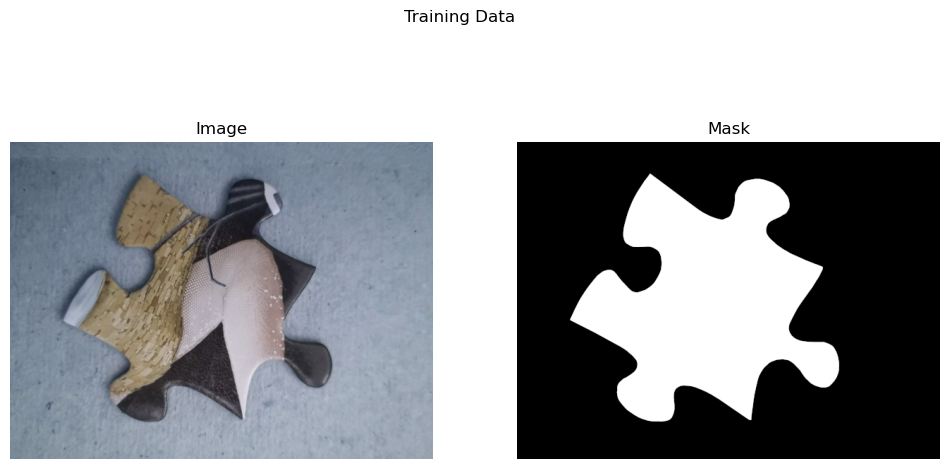

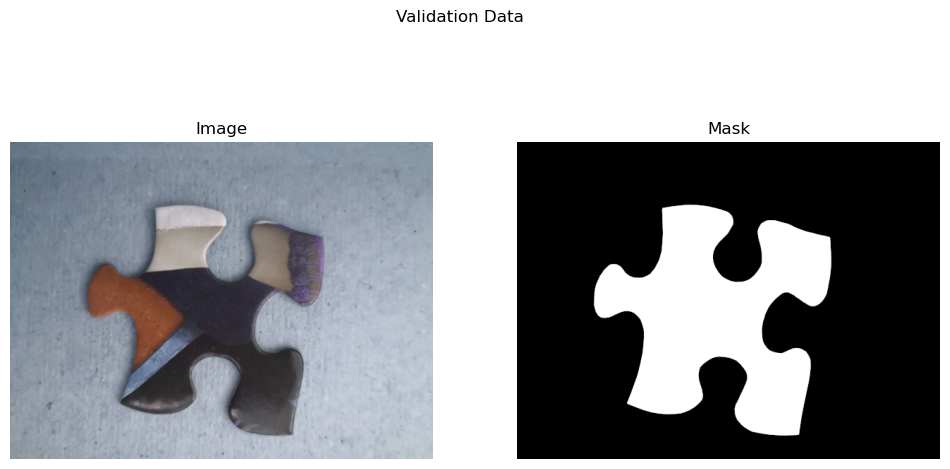

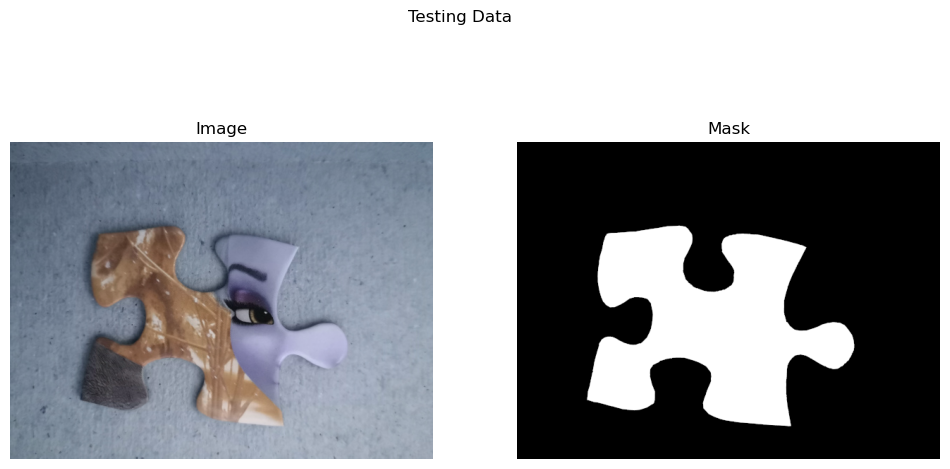

In [ ]:
base_dir = 'D:/Wits Third Block Modules/CV/Lab 1/images'
data = load_data(base_dir)

# Display training data
display_images(data['train'][0], data['train'][1], "Training Data",  "Image", "Mask")

# Display validation data
display_images(data['validation'][0], data['validation'][1], "Validation Data",  "Image", "Mask")

# Display testing data
display_images(data['test'][0], data['test'][1], "Testing Data",  "Image", "Mask")

DEFINE IMAGES

In [ ]:
train_image = data['train'][0]
train_mask =  data['train'][1]
val_image = data['validation'][0]
val_mask =  data['validation'][1]
test_image = data['test'][0]
test_mask =  data['test'][1]

CONVERT IMAGES TO RGB

In [ ]:
train_image = np.moveaxis(train_image, -1, 0)[::-1]
train_image = np.moveaxis(train_image, 0, -1)
val_image = np.moveaxis(val_image, -1, 0)[::-1]
val_image = np.moveaxis(val_image, 0, -1)
test_image = np.moveaxis(test_image, -1, 0)[::-1]
test_image = np.moveaxis(test_image, 0, -1)

REDISPLAY IMAGES

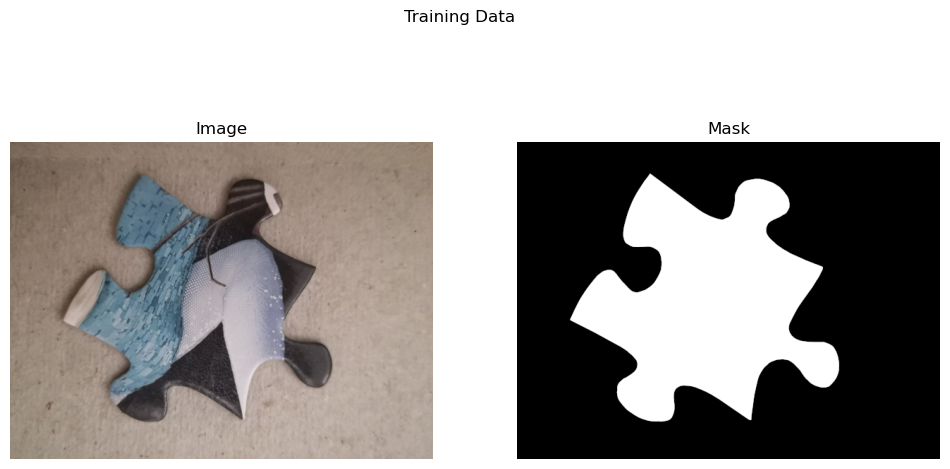

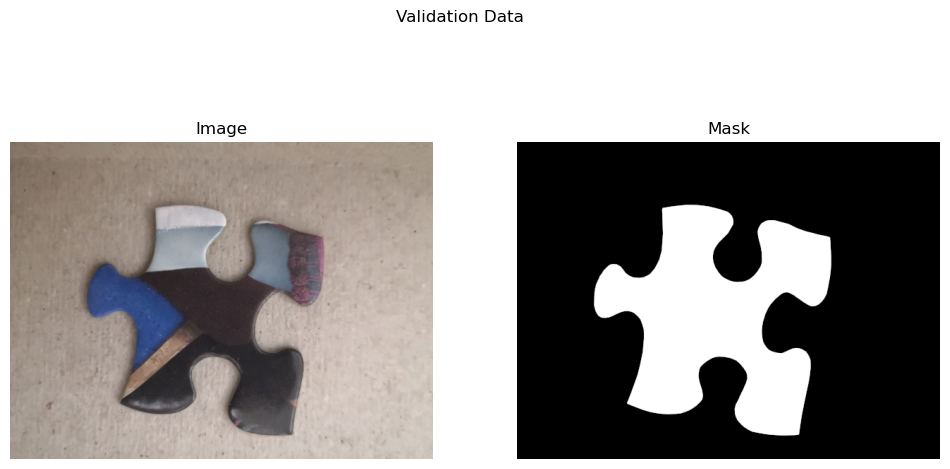

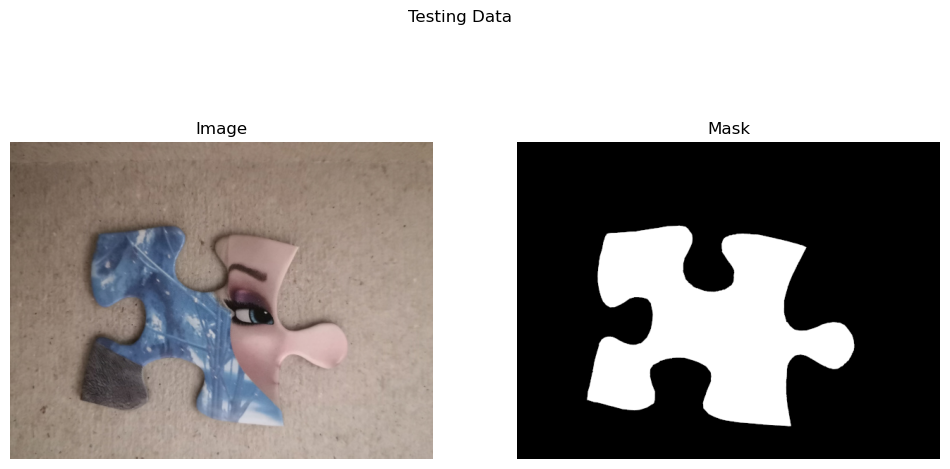

In [ ]:
display_images(train_image, train_mask, "Training Data" , "Image", "Mask")
display_images(val_image, val_mask, "Validation Data",  "Image", "Mask")
display_images(test_image, test_mask, "Testing Data", "Image", "Mask")

CONVERT IMAGES TO GRAYSCALE AND HSV

In [ ]:
train_image_gray = rgb2gray(train_image)
val_image_gray = rgb2gray(val_image)
test_image_gray = rgb2gray(test_image)
train_image_hsv = rgb2hsv(train_image)
val_image_hsv = rgb2hsv(val_image)
test_image_hsv = rgb2hsv(test_image)

DISPLAY GRAYSCALE AND HSV

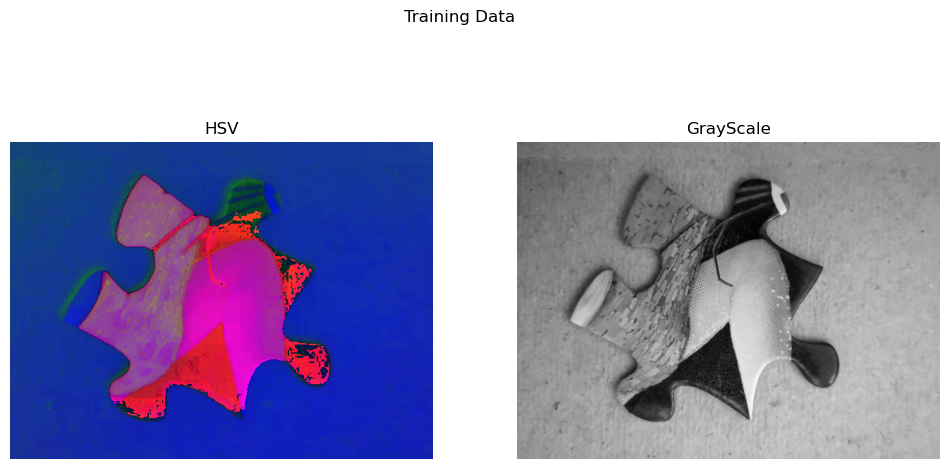

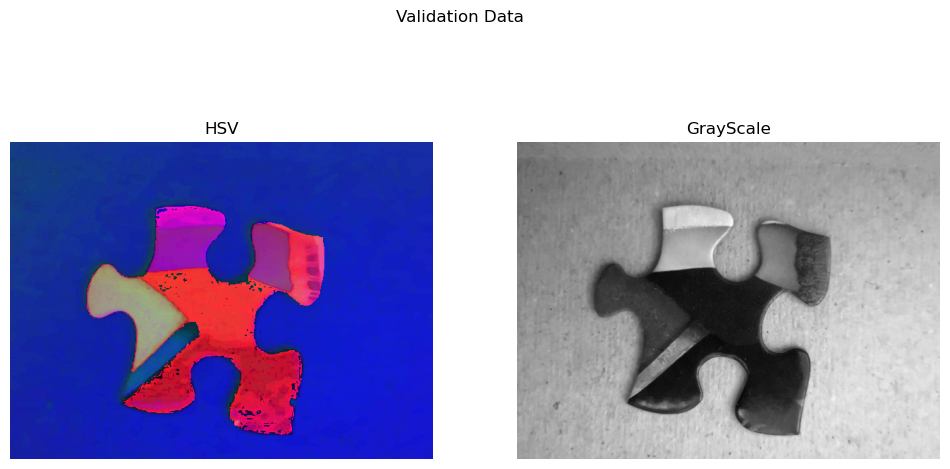

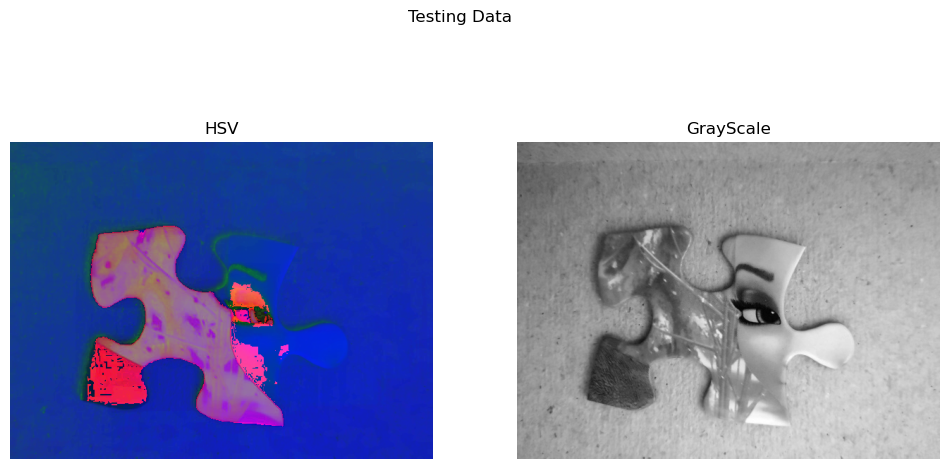

In [ ]:
display_images(train_image_hsv, train_image_gray, "Training Data" , "HSV" , "GrayScale")
display_images(val_image_hsv, val_image_gray, "Validation Data", "HSV" , "GrayScale")
display_images(test_image_hsv, test_image_gray, "Testing Data", "HSV" , "GrayScale")

CONVERT GRAYSCALE IMAGES BACK TO UINT8




In [ ]:
train_image_gray = (train_image_gray * 255).astype(np.uint8)
val_image_gray = (val_image_gray * 255).astype(np.uint8)
test_image_gray = (test_image_gray * 255).astype(np.uint8)

DESCRIPTIVE STATISTICS


In [ ]:
# Width and height of the image
height, width = train_image.shape[:2]
print(f"Width: {width}, Height: {height}")

Width: 600, Height: 450


In [ ]:
# Number of white pixels in the mask
num_white_pixels = np.sum(train_mask == 255)
print(f"Number of white pixels in the mask: {num_white_pixels}")

Number of white pixels in the mask: 73196


In [ ]:
# Maximum pixel value in the grayscale image
max_pixel_value = np.max(train_image_gray)
print(f"Maximum pixel value in the grayscale image: {max_pixel_value} ")

Maximum pixel value in the grayscale image: 229 


In [ ]:
# Maximum pixel value across all the puzzle pixels
max_puzzle_pixel_value = np.max(train_image_gray[train_mask == 255])
print(f"Maximum pixel value across all puzzle pixels: {max_puzzle_pixel_value}")

Maximum pixel value across all puzzle pixels: 229


In [ ]:
# Mean pixel intensity in the grayscale image
mean_pixel_intensity = np.mean(train_image_gray)
print(f"Mean pixel intensity in the grayscale image: {mean_pixel_intensity}")

Mean pixel intensity in the grayscale image: 136.85516296296296


In [ ]:
# Mean brightness of the puzzle pixels
mean_brightness_puzzle = np.mean(train_image_gray[train_mask == 255])
print(f"Mean brightness of the puzzle pixels: {mean_brightness_puzzle}")

Mean brightness of the puzzle pixels: 112.42003661402262


In [ ]:
# Mean brightness of the background pixels
mean_brightness_background = np.mean(train_image_gray[train_mask != 255])
print(f"Mean brightness of the background pixels: {mean_brightness_background}")

Mean brightness of the background pixels: 145.94315664315766


In [ ]:
# Variance in grayscale intensities for puzzle pixels
variance_puzzle_pixels = np.var(train_image_gray[train_mask == 255])
print(f"Variance in grayscale intensities for puzzle pixels: {variance_puzzle_pixels}")

Variance in grayscale intensities for puzzle pixels: 2490.6367147699584


In [ ]:
# Variance in grayscale intensities for background pixels
variance_background_pixels = np.var(train_image_gray[train_mask != 255])
print(f"Variance in grayscale intensities for background pixels: {variance_background_pixels}")

Variance in grayscale intensities for background pixels: 535.066752166455


c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


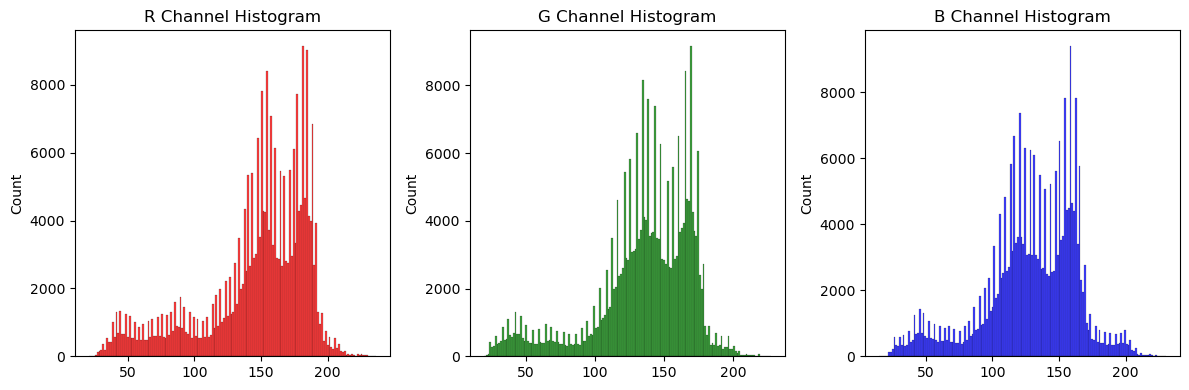

In [ ]:
# Histograms of the red, green, and blue pixel intensities in the image
plt.figure(figsize=(12, 4))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    sns.histplot(train_image[:, :, i].ravel(), kde=False, color=color)
    plt.title(f"{color.upper()} Channel Histogram")
plt.tight_layout()
plt.show()

In [ ]:
train_mask.shape

(450, 600)

c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


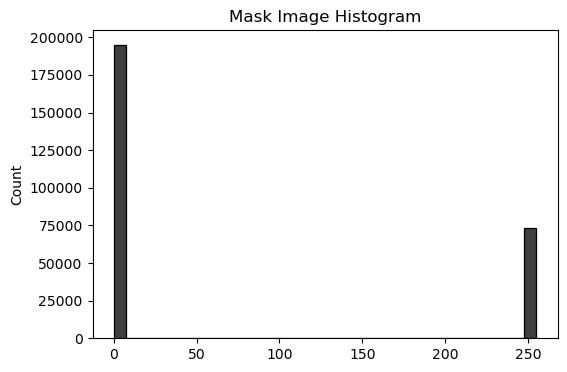

In [ ]:
# 13. Histogram of the mask image
plt.figure(figsize=(6, 4))
sns.histplot(train_mask.ravel(), kde=False, color='black')
plt.title("Mask Image Histogram")
plt.show()

c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


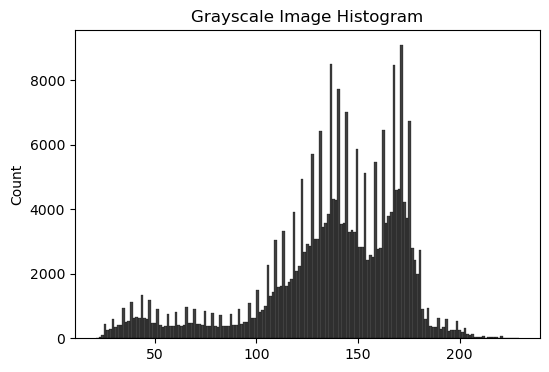

In [ ]:
# 14. Histogram of the pixel intensities in the grayscale image
plt.figure(figsize=(6, 4))
sns.histplot(train_image_gray.ravel(), kde=False, color='black')
plt.title("Grayscale Image Histogram")
plt.show()

c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


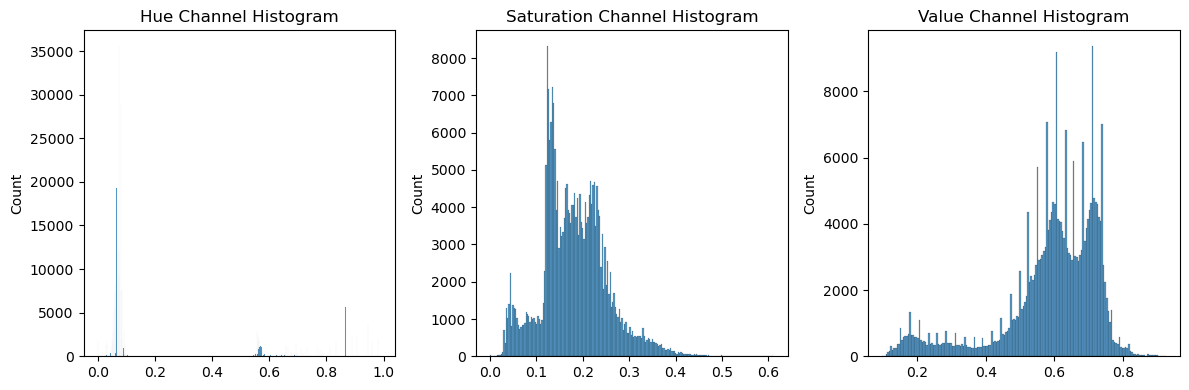

In [ ]:
# 15. Histograms of the channels in the HSV image
plt.figure(figsize=(12, 4))
hsv_channels = ['Hue', 'Saturation', 'Value']
for i, channel in enumerate(hsv_channels):
    plt.subplot(1, 3, i + 1)
    sns.histplot(train_image_hsv[:, :, i].ravel(), kde=False)
    plt.title(f"{channel} Channel Histogram")
plt.tight_layout()
plt.show()

c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


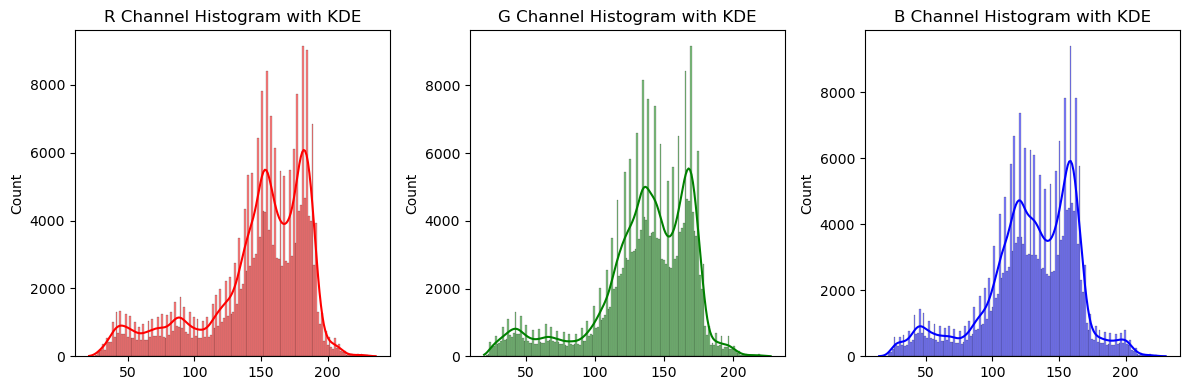

In [ ]:
# Re-plotting the histograms with Kernel Density Estimates
# RGB Histograms with KDE
plt.figure(figsize=(12, 4))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    sns.histplot(train_image[:, :, i].ravel(), kde=True, color=color)
    plt.title(f"{color.upper()} Channel Histogram with KDE")
plt.tight_layout()
plt.show()

The mask image has only one channel , pixel values  are mostly 0 and 255 without anything inbetween

c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


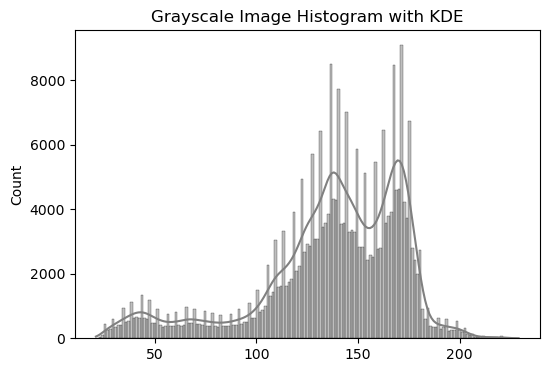

In [ ]:
# Grayscale Histogram with KDE
plt.figure(figsize=(6, 4))
sns.histplot(train_image_gray.ravel(), kde=True, color='gray')
plt.title("Grayscale Image Histogram with KDE")
plt.show()

c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smwmb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


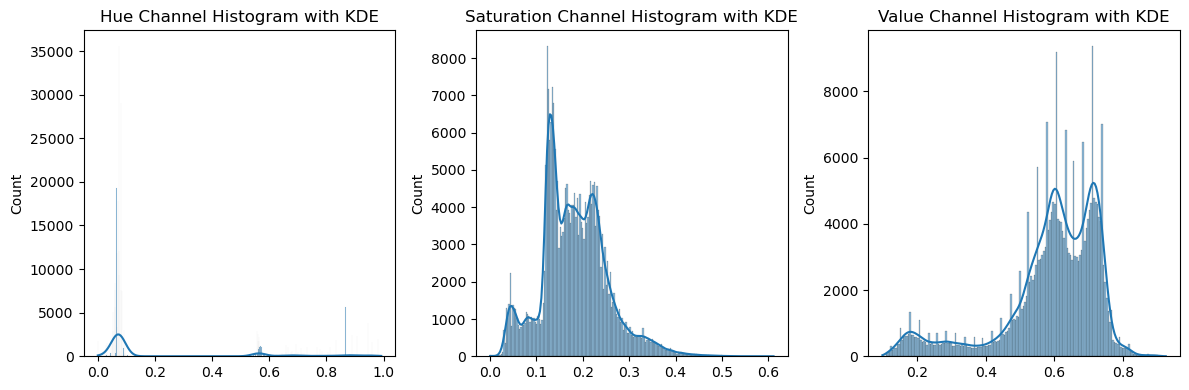

In [ ]:
# HSV Histograms with KDE
plt.figure(figsize=(12, 4))
for i, channel in enumerate(hsv_channels):
    plt.subplot(1, 3, i + 1)
    sns.histplot(train_image_hsv[:, :, i].ravel(), kde=True)
    plt.title(f"{channel} Channel Histogram with KDE")
plt.tight_layout()
plt.show()

**BACKGROUND CLASSIFIER**

DEFINE THE CONVOLUTION and CV.2D FILTER FUNCTIONS

In [ ]:
# Convolution function
def apply_convolution(image, kernel):

    # Getting the dimensions of the image and kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Here, we calculate the padding to keep the dimensions the same after convolution
    pad_y = kernel_height // 2
    pad_x = kernel_width // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=0)

    # Apply convolution
    convolved_image = convolve(padded_image, kernel, mode='constant', cval=0.0)

    # Crop the result to the original image size
    start_y, start_x = pad_y, pad_x
    end_y, end_x = start_y + img_height, start_x + img_width
    result = convolved_image[start_y:end_y, start_x:end_x]

    return result

CONVERT IMAGES TO FLOAT

In [ ]:
train_image = train_image.astype(np.float32) / 255.0
train_mask = train_mask.astype(np.float32) / 255.0
val_image = val_image.astype(np.float32) / 255.0
#val_mask = val_mask.astype(np.float32) / 255.0
test_image = test_image.astype(np.float32) / 255.0
#test_mask = test_mask.astype(np.float32) / 255.0

DEFINE FILTER KERNELS

In [ ]:
prewitt_vertical_kernel = np.array([[-1,  0,  1],
                                    [-1,  0,  1],
                                    [-1,  0,  1]])

prewitt_horizontal_kernel = np.array([[-1, -1, -1],
                                      [ 0,  0,  0],
                                      [ 1,  1,  1]])

laplacian_kernel = np.array([[ 0,  1,  0],
                             [ 1, -4,  1],
                             [ 0,  1,  0]])

APPLY CONVOLUTION AND CV.filter2D

In [ ]:
train_image_prewitt_v = train_image.copy()
train_image_prewitt_h = train_image.copy()
train_image_laplacian = train_image.copy()
train_image_prewitt_v_cv2 = train_image.copy()
train_image_prewitt_h_cv2 = train_image.copy()
train_image_laplacian_cv2 = train_image.copy()

channels = train_image.shape[2]

for i in range(channels):
    train_image_prewitt_v[: ,:, i] = apply_convolution(train_image[: ,:, i],prewitt_vertical_kernel )
    train_image_prewitt_h[: ,:, i] =  apply_convolution(train_image [: ,:, i],prewitt_horizontal_kernel )
    train_image_laplacian[: ,:, i] = apply_convolution(train_image[: ,:, i],laplacian_kernel, )
    train_image_prewitt_v_cv2[: ,:, i] = cv2.filter2D(train_image[: ,:, i],-1,prewitt_vertical_kernel)
    train_image_prewitt_h_cv2[: ,:, i] = cv2.filter2D(train_image[: ,:, i],-1, prewitt_horizontal_kernel)
    train_image_laplacian_cv2[: ,:, i] = cv2.filter2D(train_image[: ,:, i],-1,laplacian_kernel)

val_image_prewitt_v = val_image.copy()
val_image_prewitt_h = val_image.copy()
val_image_laplacian = val_image.copy()
val_image_prewitt_v_cv2 = val_image.copy()
val_image_prewitt_h_cv2 = val_image.copy()
val_image_laplacian_cv2 = val_image.copy()

channels = val_image.shape[2]

for i in range(channels):
    val_image_prewitt_v[: ,:, i] = apply_convolution(val_image[: ,:, i],prewitt_vertical_kernel )
    val_image_prewitt_h[: ,:, i] =  apply_convolution(val_image [: ,:, i],prewitt_horizontal_kernel )
    val_image_laplacian[: ,:, i] = apply_convolution(val_image[: ,:, i],laplacian_kernel, )
    val_image_prewitt_v_cv2[: ,:, i] = cv2.filter2D(val_image[: ,:, i],-1,prewitt_vertical_kernel)
    val_image_prewitt_h_cv2[: ,:, i] = cv2.filter2D(val_image[: ,:, i],-1, prewitt_horizontal_kernel)
    val_image_laplacian_cv2[: ,:, i] = cv2.filter2D(val_image[: ,:, i],-1,laplacian_kernel)

test_image_prewitt_v = test_image.copy()
test_image_prewitt_h = test_image.copy()
test_image_laplacian = test_image.copy()
test_image_prewitt_v_cv2 = test_image.copy()
test_image_prewitt_h_cv2 = test_image.copy()
test_image_laplacian_cv2 = test_image.copy()

channels = test_image.shape[2]

for i in range(channels):
    test_image_prewitt_v[: ,:, i] = apply_convolution(test_image[: ,:, i],prewitt_vertical_kernel )
    test_image_prewitt_h[: ,:, i] =  apply_convolution(test_image [: ,:, i],prewitt_horizontal_kernel )
    test_image_laplacian[: ,:, i] = apply_convolution(test_image[: ,:, i],laplacian_kernel, )
    test_image_prewitt_v_cv2[: ,:, i] = cv2.filter2D(test_image[: ,:, i],-1,prewitt_vertical_kernel)
    test_image_prewitt_h_cv2[: ,:, i] = cv2.filter2D(test_image[: ,:, i],-1, prewitt_horizontal_kernel)
    test_image_laplacian_cv2[: ,:, i] = cv2.filter2D(test_image[: ,:, i],-1,laplacian_kernel)

PRINT FILTERED IMAGES AND COMPARE

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 599.5, 449.5, -0.5)

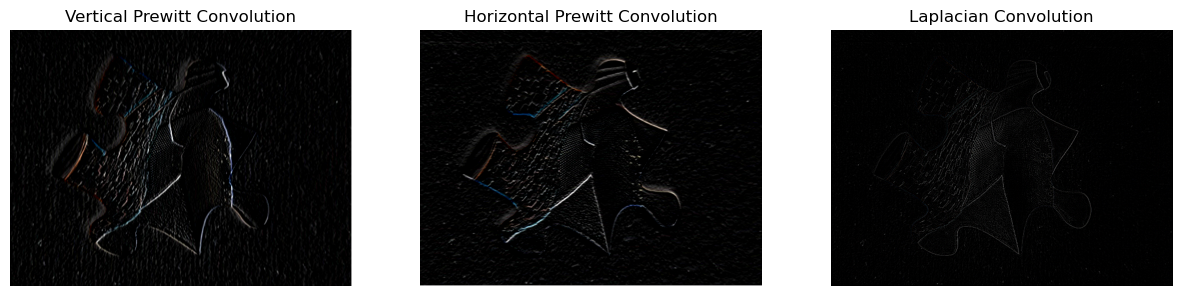

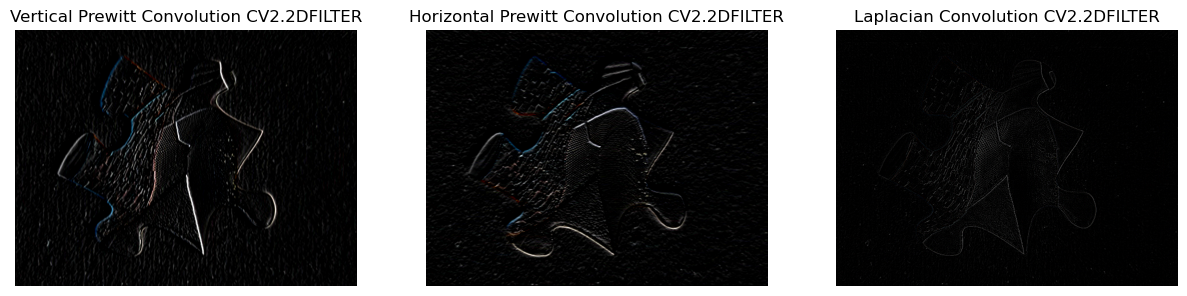

In [ ]:
plt.figure(figsize=(15, 5))

# Vertical Prewitt Convolution
plt.subplot(1, 3, 1)
plt.title('Vertical Prewitt Convolution')
plt.imshow(train_image_prewitt_v, cmap='gray')
plt.axis('off')

# Horizontal Prewitt Convolution
plt.subplot(1, 3, 2)
plt.title('Horizontal Prewitt Convolution')
plt.imshow(train_image_prewitt_h, cmap='gray')
plt.axis('off')

# Laplacian Convolution
plt.subplot(1, 3, 3)
plt.title('Laplacian Convolution')
plt.imshow(train_image_laplacian, cmap='gray')
plt.axis('off')

plt.figure(figsize=(15, 5))

# Vertical Prewitt Convolution
plt.subplot(1, 3, 1)
plt.title('Vertical Prewitt Convolution CV2.2DFILTER')
plt.imshow(train_image_prewitt_v_cv2, cmap='gray')
plt.axis('off')

# Horizontal Prewitt Convolution
plt.subplot(1, 3, 2)
plt.title('Horizontal Prewitt Convolution CV2.2DFILTER')
plt.imshow(train_image_prewitt_h_cv2, cmap='gray')
plt.axis('off')

# Laplacian Convolution
plt.subplot(1, 3, 3)
plt.title('Laplacian Convolution CV2.2DFILTER')
plt.imshow(train_image_laplacian_cv2, cmap='gray')
plt.axis('off')

Edges using CV.2D Filter seem to be more visible and more defined

SELECT RELEVANT FEATURES FOR IMAGES USING PREDEFINED ATTRIBUTES

In [ ]:
# Stack features
feature_vector_train  = np.stack([
        train_image_prewitt_v[:, :, 0],  # PrewittV R
        train_image_prewitt_h[:, :, 0], # PrewittHR
        train_image_prewitt_v[:, :, 1],  # PrewittV G
        train_image_prewitt_h[:, :, 1], # PrewittHG
        train_image_prewitt_v[:, :, 2],  # PrewittV B
        train_image_prewitt_h[:, :, 2], # PrewittHB
        train_image_laplacian[:, :, 0],         # Laplacian R
        train_image_laplacian[:, :, 1],         # Laplacian G
        train_image_laplacian[:, :, 2],         # Laplacian B
        train_image[:, :, 0],                   # R
        train_image[:, :, 1],                   # G
        train_image[:, :, 2],                   # B
        train_image_hsv[:, :, 0], # H
        train_image_hsv[:, :, 1], # S
        train_image_hsv[:, :, 2]  # V
    ], axis=-1)

feature_vector_val  = np.stack([
        val_image_prewitt_v[:, :, 0],  # PrewittV R
        val_image_prewitt_h[:, :, 0], # PrewittHR
        val_image_prewitt_v[:, :, 1],  # PrewittV G
        val_image_prewitt_h[:, :, 1], # PrewittHG
        val_image_prewitt_v[:, :, 2],  # PrewittV B
        val_image_prewitt_h[:, :, 2], # PrewittHB
        val_image_laplacian[:, :, 0],         # Laplacian R
        val_image_laplacian[:, :, 1],         # Laplacian G
        val_image_laplacian[:, :, 2],         # Laplacian B
        val_image[:, :, 0],                   # R
        val_image[:, :, 1],                   # G
        val_image[:, :, 2],                   # B
        val_image_hsv[:, :, 0], # H
        val_image_hsv[:, :, 1], # S
        val_image_hsv[:, :, 2]  # V
    ], axis=-1)

feature_vector_test  = np.stack([
        test_image_prewitt_v[:, :, 0],  # PrewittV R
        test_image_prewitt_h[:, :, 0], # PrewittHR
        test_image_prewitt_v[:, :, 1],  # PrewittV G
        test_image_prewitt_h[:, :, 1], # PrewittHG
        test_image_prewitt_v[:, :, 2],  # PrewittV B
        test_image_prewitt_h[:, :, 2], # PrewittHB
        test_image_laplacian[:, :, 0],         # Laplacian R
        test_image_laplacian[:, :, 1],         # Laplacian G
        test_image_laplacian[:, :, 2],         # Laplacian B
        test_image[:, :, 0],                   # R
        test_image[:, :, 1],                   # G
        test_image[:, :, 2],                   # B
        test_image_hsv[:, :, 0], # H
        test_image_hsv[:, :, 1], # S
        test_image_hsv[:, :, 2]  # V
    ], axis=-1)

USING THE TRAINING FEATURE VECTOR CALCULATE MEAN AND CO-VARIANCE VALUES

In [ ]:
# Extract foreground and background features
fg_features = feature_vector_train[train_mask > 0]
bg_features = feature_vector_train[train_mask == 0]

# Calculate mean and covariance for foreground pixels
mean_fg = np.mean(fg_features, axis=0)
cov_fg = np.cov(fg_features, rowvar=False)

# Calculate mean and covariance for background pixels
mean_bg = np.mean(bg_features, axis=0)
cov_bg = np.cov(bg_features, rowvar=False)

N_fg  = np.sum(train_mask > 0)
N_bg =  np.sum(train_mask == 0)
N = np.sum(train_mask)

print(f"The number of foreground pixels is: {N_fg}")
print(f"The number of background pixels is: {N_bg}")
print(f"The number of Total pixels is: {N}")
print("")
print(f"The foreground mean matrix: {mean_fg}")
print("")
print(f"The background mean matrix: {mean_bg}")
print("")
print(f"The foreground covariance matrix: {cov_fg}")
print("")
print(f"The background covariance matrix: {cov_bg}")

The number of foreground pixels is: 75145
The number of background pixels is: 194855
The number of Total pixels is: 74474.7265625

The foreground mean matrix: [-0.00715787 -0.00650538 -0.00670244 -0.00666252 -0.00665892 -0.00705538
  0.00121569  0.00087658  0.00060928  0.42473368  0.44332999  0.47597903
  0.60731049  0.17260718  0.48795769]

The background mean matrix: [ 0.00184711  0.0013435   0.0016449   0.00125922  0.00155164  0.00126644
 -0.00708084 -0.00630047 -0.00560749  0.62974522  0.56568867  0.51682861
  0.07170374  0.18501083  0.62974564]

The foreground covariance matrix: [[ 3.79596839e-02  3.50057293e-03  3.71033188e-02  3.72049440e-03
   3.70758759e-02  3.86510104e-03 -1.71232461e-04 -1.29773891e-04
  -1.43144312e-04 -1.94217166e-04  2.32839611e-04  6.40974811e-04
   1.59746459e-03  7.52210964e-05  2.85168666e-04]
 [ 3.50057293e-03  2.37217719e-02  3.72940267e-03  2.31977410e-02
   3.87892005e-03  2.28943523e-02 -1.77994525e-04 -1.44860726e-04
  -1.19346985e-04 -1.1810944

USING OBTAINED VALUE AND CLASSIFICATION FORMULA CALCULATE PROBABILITY OF PIXEL BEING FOREGROUND

In [ ]:
def classifier(feature_vector, threshold):
    pr_x_fg = stats.multivariate_normal.pdf(feature_vector, mean=mean_fg, cov=cov_fg)
    pr_x_bg = stats.multivariate_normal.pdf(feature_vector, mean=mean_bg, cov=cov_bg)

    denominator = (pr_x_fg * N_fg) + (pr_x_bg * N_bg)

    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        pr_fg_x = np.divide(pr_x_fg * N_fg, denominator, where=denominator != 0)
        pr_fg_x[denominator == 0] = 0

    classified_image = np.where(pr_fg_x < threshold, 0, 255)

    return classified_image

CLASSIFY THE VALIDATION IMAGE USING A THRESHOLD OF 0.95

In [ ]:
classified_image_val=classifier(feature_vector_val,0.95)

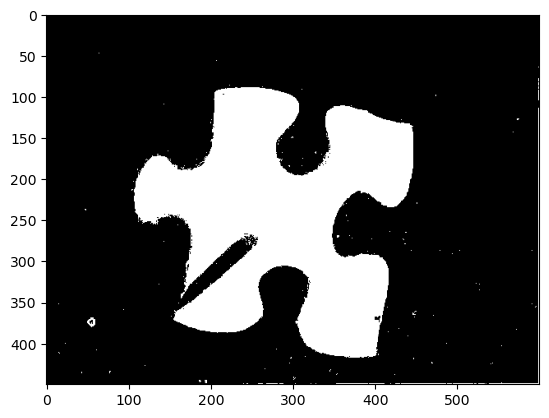

In [ ]:
plt.imshow(classified_image_val, cmap='gray')

 EVALUATION METRICS

In [ ]:
def calculate_metrics(predicted_mask, mask):
    # Ensure the masks are in uint8 format for thresholding
    predicted_mask = predicted_mask.astype(np.uint8)
    mask = mask.astype(np.uint8)

    # Apply thresholding to obtain binary masks
    _, predicted_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Flatten the masks
    predicted_mask_flat = predicted_mask.flatten()
    ground_truth_mask_flat = mask.flatten()

    # Calculate metrics
    accuracy = accuracy_score(ground_truth_mask_flat, predicted_mask_flat)
    precision = precision_score(ground_truth_mask_flat, predicted_mask_flat, pos_label=255)
    recall = recall_score(ground_truth_mask_flat, predicted_mask_flat, pos_label=255)
    f1 = f1_score(ground_truth_mask_flat, predicted_mask_flat, pos_label=255)
    conf_matrix = confusion_matrix(ground_truth_mask_flat, predicted_mask_flat, labels=[0, 255])

    return accuracy, precision, recall, f1, conf_matrix

CALCULATE EVALUATION METRICS FOR VALIDATION SET

Accuracy: 0.9767925925925925
Precision: 0.9328992208373998
Recall: 0.965684569649393
F1 Score: 0.9490088213274307


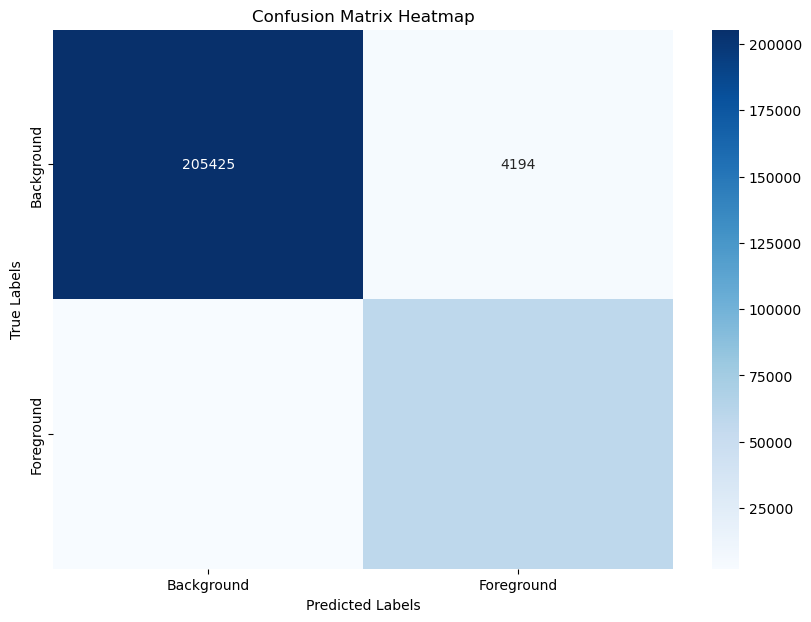

In [ ]:
accuracy, precision, recall, f1, conf_matrix = calculate_metrics(classified_image_val, val_mask)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
        xticklabels=['Background', 'Foreground'], yticklabels=['Background', 'Foreground'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

SHOWING HOW METRICS CHANGE AS THE THRESHOLD VALUES CHANGE

In [ ]:
def plot_metrics_and_confusion_components(feature_vector,mask):
    # Define thresholds and empty lists to store metrics
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]  # Adjust the thresholds as needed
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize lists to store confusion matrix components
    TPs = []
    FPs = []
    TNs = []
    FNs = []

    for threshold in thresholds:
        # Call the classifier function with feature_vector_val and the current threshold
        imge = classifier(feature_vector, threshold)
        # Calculate metrics using the generated image and the validation mask
        accuracy, precision, recall, f1, conf_matrix = calculate_metrics(imge, mask)

        # Store the metrics in lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Store confusion matrix components
        TPs.append(conf_matrix[0, 0])
        FPs.append(conf_matrix[0, 1])
        TNs.append(conf_matrix[1, 1])
        FNs.append(conf_matrix[1, 0])

    # Create a new figure for each metric
    plt.figure(figsize=(18, 12))

    # Accuracy Plot
    plt.subplot(3, 2, 1)
    plt.plot(thresholds, accuracies, marker='o', color='b')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Threshold')
    plt.grid(True)

    # Precision Plot
    plt.subplot(3, 2, 2)
    plt.plot(thresholds, precisions, marker='o', color='g')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.title('Precision vs. Threshold')
    plt.grid(True)

    # Recall Plot
    plt.subplot(3, 2, 3)
    plt.plot(thresholds, recalls, marker='o', color='r')
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.title('Recall vs. Threshold')
    plt.grid(True)

    # F1 Score Plot
    plt.subplot(3, 2, 4)
    plt.plot(thresholds, f1_scores, marker='o', color='m')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs. Threshold')
    plt.grid(True)

    # Confusion Matrix Components Plot: True Positives
    plt.subplot(3, 2, 5)
    plt.plot(thresholds, TPs, marker='o', color='c', label='TP')
    plt.xlabel('Threshold')
    plt.ylabel('Count')
    plt.title('True Positives vs. Threshold')
    plt.grid(True)

    # Confusion Matrix Components Plot: False Positives
    plt.subplot(3, 2, 6)
    plt.plot(thresholds, FPs, marker='o', color='m', label='FP')
    plt.xlabel('Threshold')
    plt.ylabel('Count')
    plt.title('False Positives vs. Threshold')
    plt.grid(True)

    # Confusion Matrix Components Plot: True Negatives
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    plt.plot(thresholds, TNs, marker='o', color='y', label='TN')
    plt.xlabel('Threshold')
    plt.ylabel('Count')
    plt.title('True Negatives vs. Threshold')
    plt.grid(True)

    # Confusion Matrix Components Plot: False Negatives
    plt.subplot(2, 2, 2)
    plt.plot(thresholds, FNs, marker='o', color='k', label='FN')
    plt.xlabel('Threshold')
    plt.ylabel('Count')
    plt.title('False Negatives vs. Threshold')
    plt.grid(True)

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

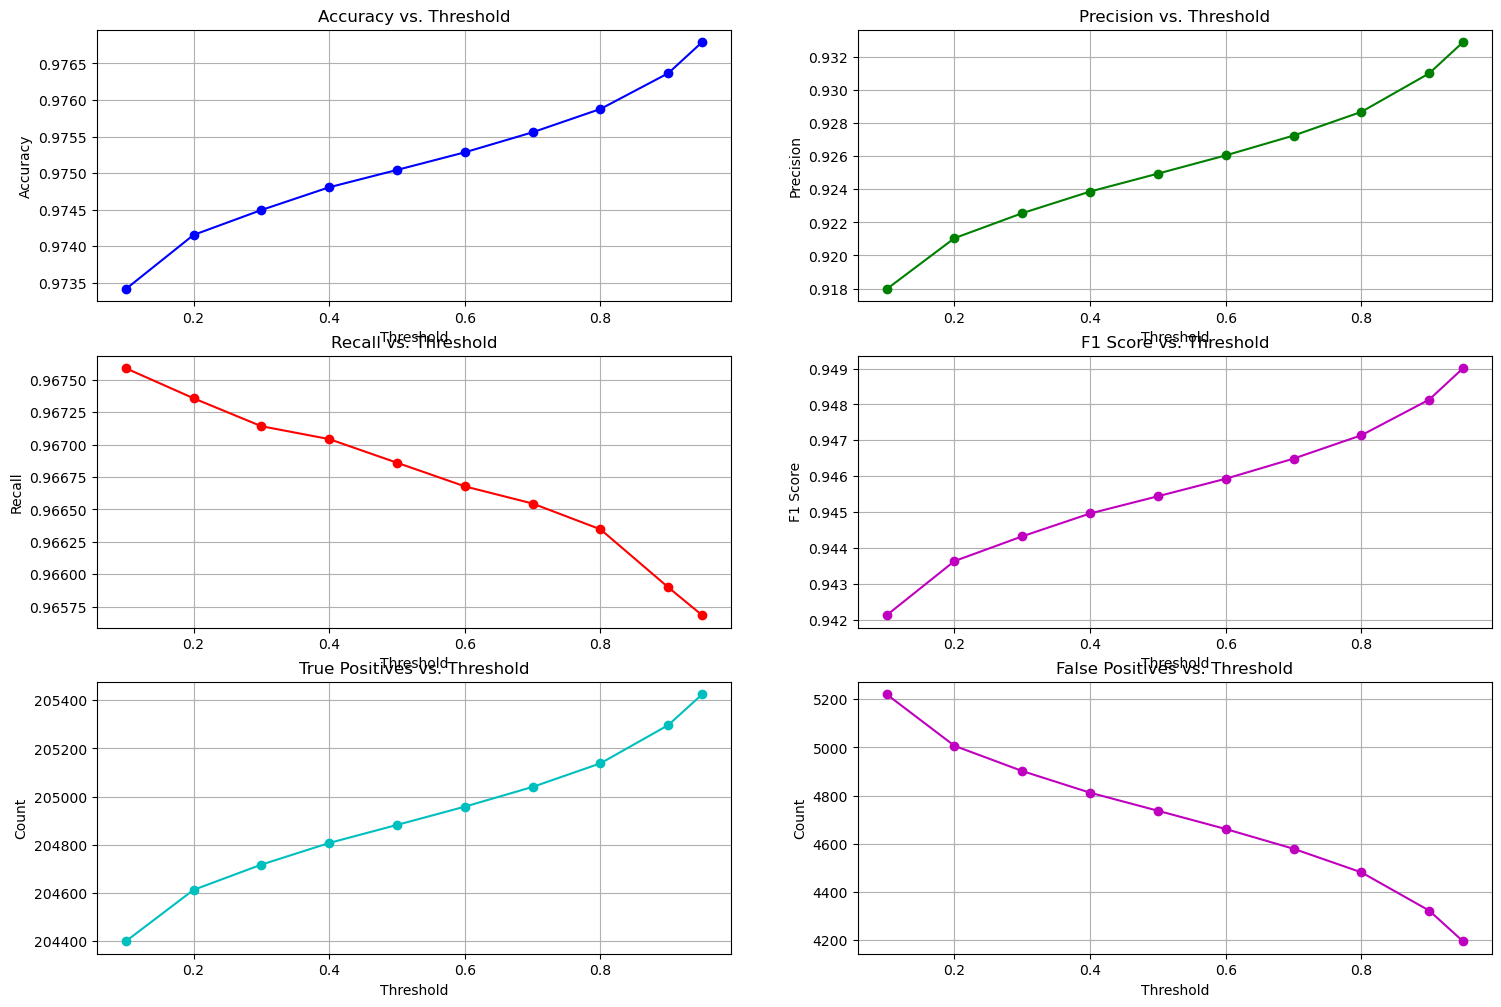

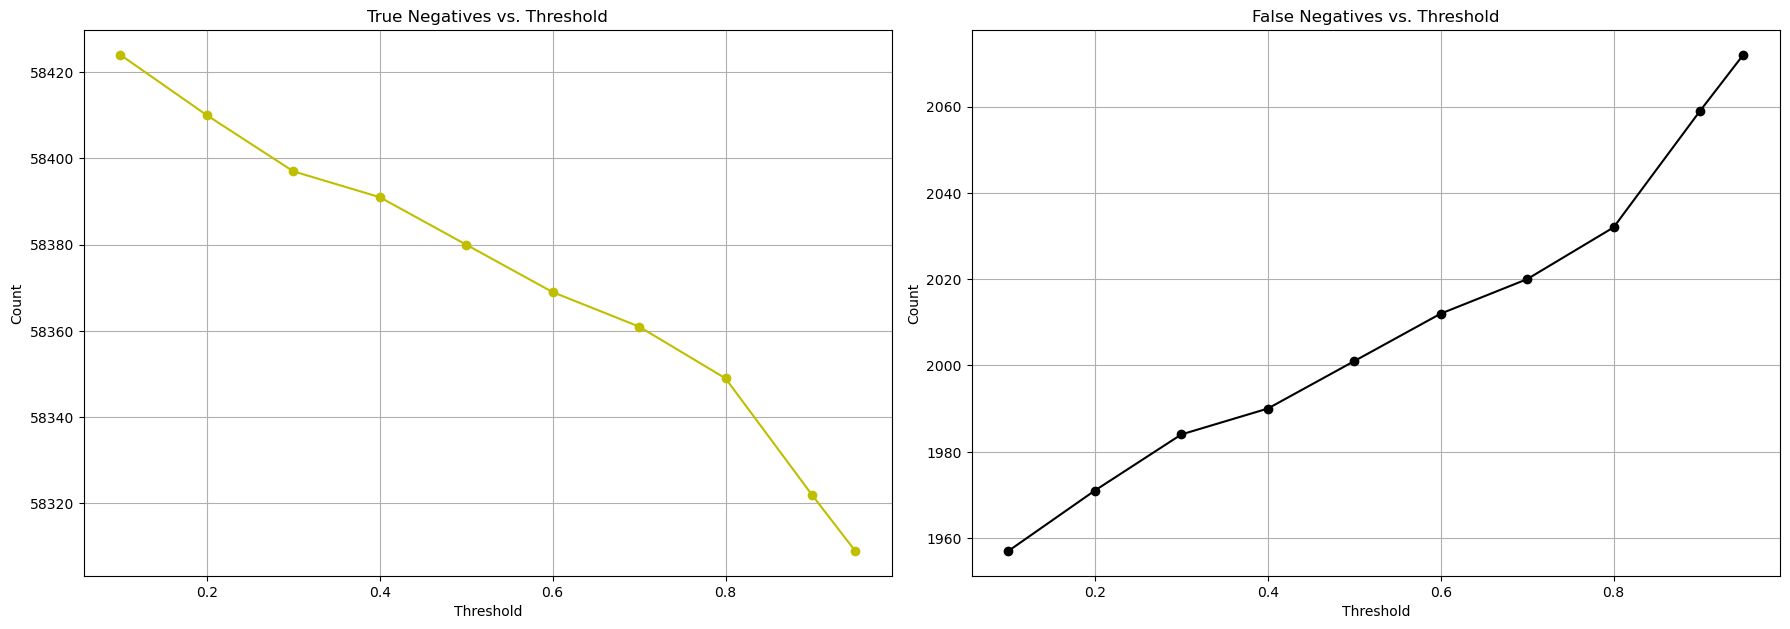

In [ ]:

plot_metrics_and_confusion_components(feature_vector_val,val_mask)

 Increasing threshold values shows a positive effect on evaluation metrics accuracy , precision and the F1 score increase as the threshold increases. Though the margin of difference is very small, showing high distinction between attributes of puzzle pieces and background.

PLOT ROC CURVE

In [ ]:
def plot_roc_curve(predicted_probs, ground_truth_mask):

    # Ensure predicted_probs is a flat array
    predicted_probs = predicted_probs.flatten()

    # Flatten the ground truth mask
    ground_truth_mask_flat = ground_truth_mask.flatten()

    ground_truth_binary = np.where(ground_truth_mask_flat > 0, 1, 0)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(ground_truth_binary, predicted_probs)
    roc_auc = roc_auc_score(ground_truth_binary, predicted_probs)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    return roc_auc

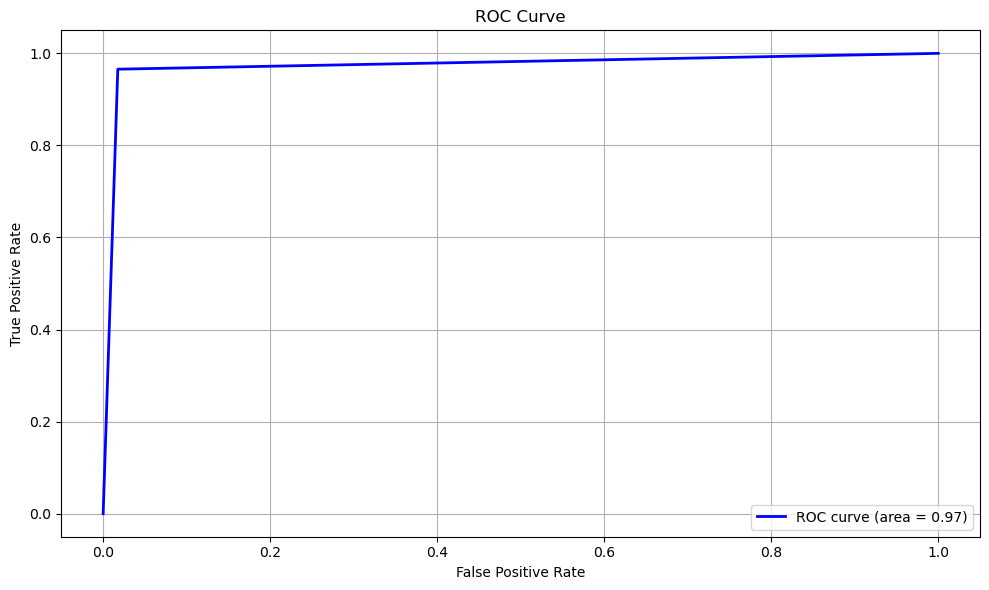

0.9740437846284146

In [ ]:
plot_roc_curve(classified_image_val, val_mask)

EVALUATE IOU

In [ ]:
def evaluate_iou_vs_thresholds( feature_vector,mask):

    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

    ious = []  # List to store IoU scores

    for threshold in thresholds:
        # Get predicted mask
        predicted_mask = classifier(feature_vector, threshold)

        # Ensure predicted mask and ground truth mask are binary
        predicted_mask_binary = (predicted_mask > 0).astype(np.int32)
        ground_truth_mask_binary = (mask > 0).astype(np.int32)

        # Calculate Intersection and Union for IoU
        intersection = np.logical_and(predicted_mask_binary, ground_truth_mask_binary).sum()
        union = np.logical_or(predicted_mask_binary, ground_truth_mask_binary).sum()
        iou_score = intersection / union if union != 0 else 0

        # Print IoU score for the current threshold
        print(f'Threshold: {threshold}, IoU Score: {iou_score:.4f}')

        # Store IoU score
        ious.append(iou_score)


    # Create a figure for IoU score plot
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, ious, marker='o', color='c')
    plt.xlabel('Threshold')
    plt.ylabel('IoU Score')
    plt.title('IoU Score vs. Threshold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Threshold: 0.1, IoU Score: 0.8986
Threshold: 0.2, IoU Score: 0.9013
Threshold: 0.3, IoU Score: 0.9025
Threshold: 0.4, IoU Score: 0.9037
Threshold: 0.5, IoU Score: 0.9045
Threshold: 0.6, IoU Score: 0.9054
Threshold: 0.7, IoU Score: 0.9064
Threshold: 0.8, IoU Score: 0.9075
Threshold: 0.9, IoU Score: 0.9093
Threshold: 0.95, IoU Score: 0.9109


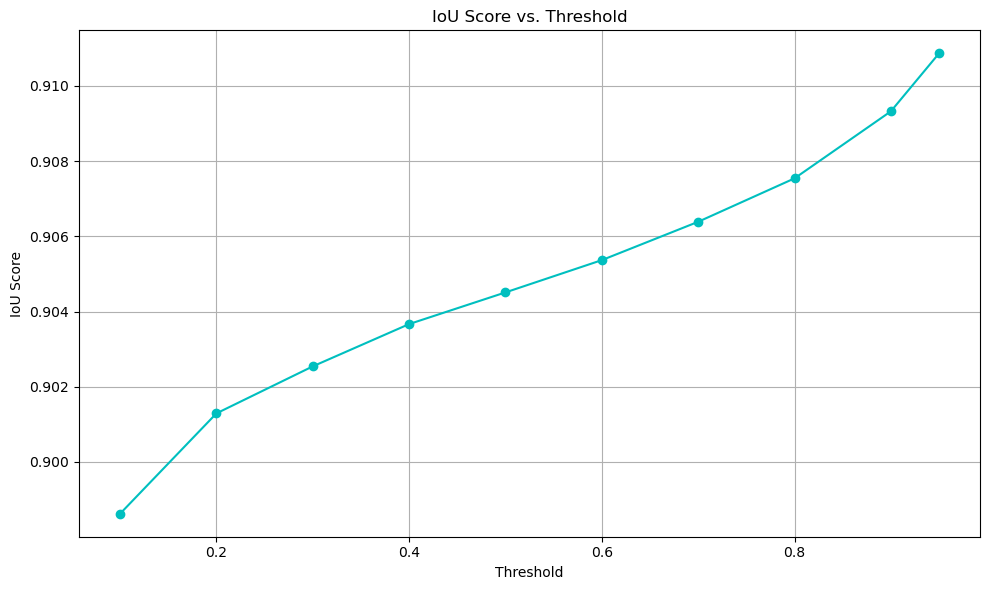

In [ ]:
evaluate_iou_vs_thresholds(feature_vector_val,val_mask)

FEATURE SELECTION: Random Forest

One of the common methods for feature selection is using Embedded Methods, they leverage the feature importance scores obtained directly from model training, with Random Forest being a popular choice for this purpose. As Random Forest builds multiple decision trees during training, it calculates the importance of each feature based on how often and how significantly they contribute to the decision splits. This method integrates feature selection into the model training process, ensuring that the selected features are inherently tied to the model's predictive performance.  For this Lab for evaluation the number of significant features used is varied.  

In [ ]:
train_mask = (train_mask).astype(np.uint8)

num_pixels = feature_vector_train.shape[0] * feature_vector_train.shape[1]
num_features = feature_vector_train.shape[2]
X = feature_vector_train.reshape((num_pixels, num_features))

# Reshape the train mask to 1D array
y = train_mask.flatten()

CHOOSE 5 TOP FEATURES USING Random Forest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Apply Random Forest to get feature importances
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
importances = model_rf.feature_importances_

# Get indices of top features
indices = np.argsort(importances)[::-1]
selected_features_embedded = indices[:5]
print("Selected features by embedded method:", selected_features_embedded)

Selected features by embedded method: [12  9 13 14 11]


CHOOSE 10 TOP FEATURES USING Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Apply Random Forest to get feature importances
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
importances = model_rf.feature_importances_

# Get indices of top features
indices = np.argsort(importances)[::-1]
selected_features_embedded = indices[:9]
print("Selected features by embedded method:", selected_features_embedded)

Selected features by embedded method: [12  9 13 11 14 10  6  7  8]


DEFINE NEW FEATURE VECTORS USING SELECTED FEATURES

In [ ]:
# Indices of the features to select from the last dimension
selected_indices1 = [ 9 , 11 ,12 ,13, 14]
selected_indices2 = [12 , 9 ,14 ,10 ,13 ,11,8,7,6]
selected_indices3 = [ 12, 11, 10, 9, 6, 1]

# Slice the array using the last dimension
new_feature_vector_train1 = feature_vector_train[:, :, selected_indices1]
new_feature_vector_train2 = feature_vector_train[:, :, selected_indices2]
new_feature_vector_train3 = feature_vector_train[:, :, selected_indices3]

new_feature_vector_val1 = feature_vector_val[:, :, selected_indices1]
new_feature_vector_val2 = feature_vector_val[:, :, selected_indices2]
new_feature_vector_val3 = feature_vector_val[:, :, selected_indices3]

new_feature_vector_test1 = feature_vector_test[:, :, selected_indices1]
new_feature_vector_test2 = feature_vector_test[:, :, selected_indices2]
new_feature_vector_test3 = feature_vector_test[:, :, selected_indices3]

RECALCULATE MEANS AND COVARIANCE

In [ ]:
# Extract foreground and background features
fg_features = new_feature_vector_train1[train_mask > 0]
bg_features = new_feature_vector_train1[train_mask == 0]

# Calculate mean and covariance for foreground pixels
mean_fg = np.mean(fg_features, axis=0)
cov_fg = np.cov(fg_features, rowvar=False)

# Calculate mean and covariance for background pixels
mean_bg = np.mean(bg_features, axis=0)
cov_bg = np.cov(bg_features, rowvar=False)

N_fg  = np.sum(train_mask > 0)
N_bg =  np.sum(train_mask == 0)

EVALUATE THE FIRST GROUP OF SELECTED FEATURES

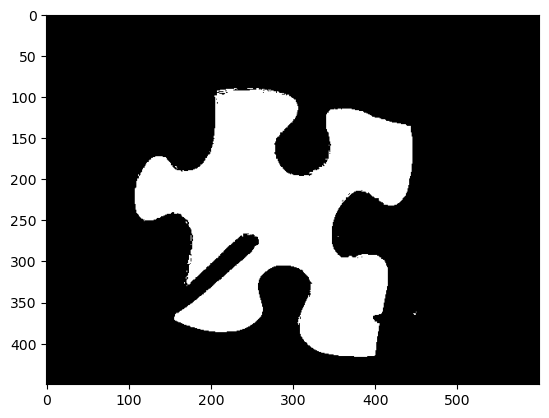

In [ ]:
classified_image=classifier(new_feature_vector_val1,0.95)
plt.imshow(classified_image, cmap='gray')

SUMMARY OF EVALUATION METRICS

Accuracy: 0.9841111111111112
Precision: 0.9779966935387657
Recall: 0.950332058097746
F1 Score: 0.9639659314260756


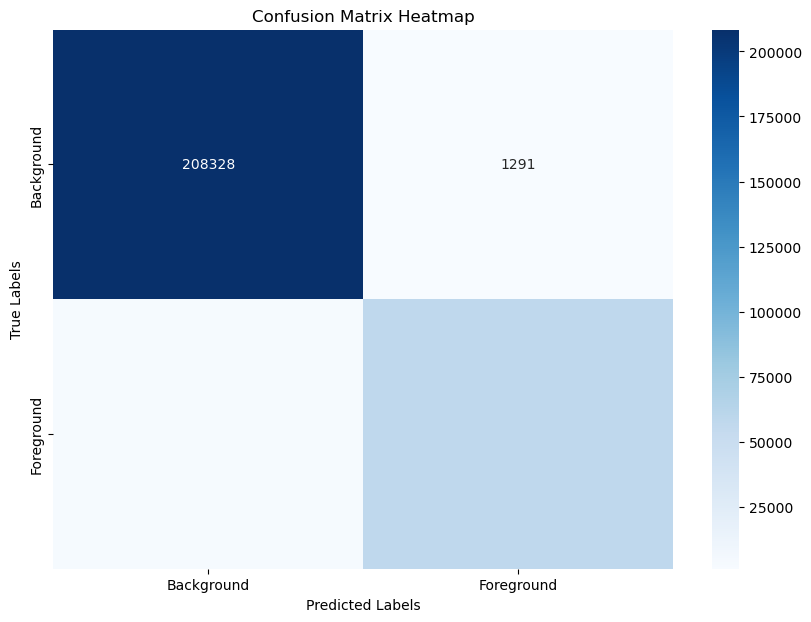

In [ ]:
accuracy, precision, recall, f1, conf_matrix = calculate_metrics(classified_image, val_mask)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
        xticklabels=['Background', 'Foreground'], yticklabels=['Background', 'Foreground'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

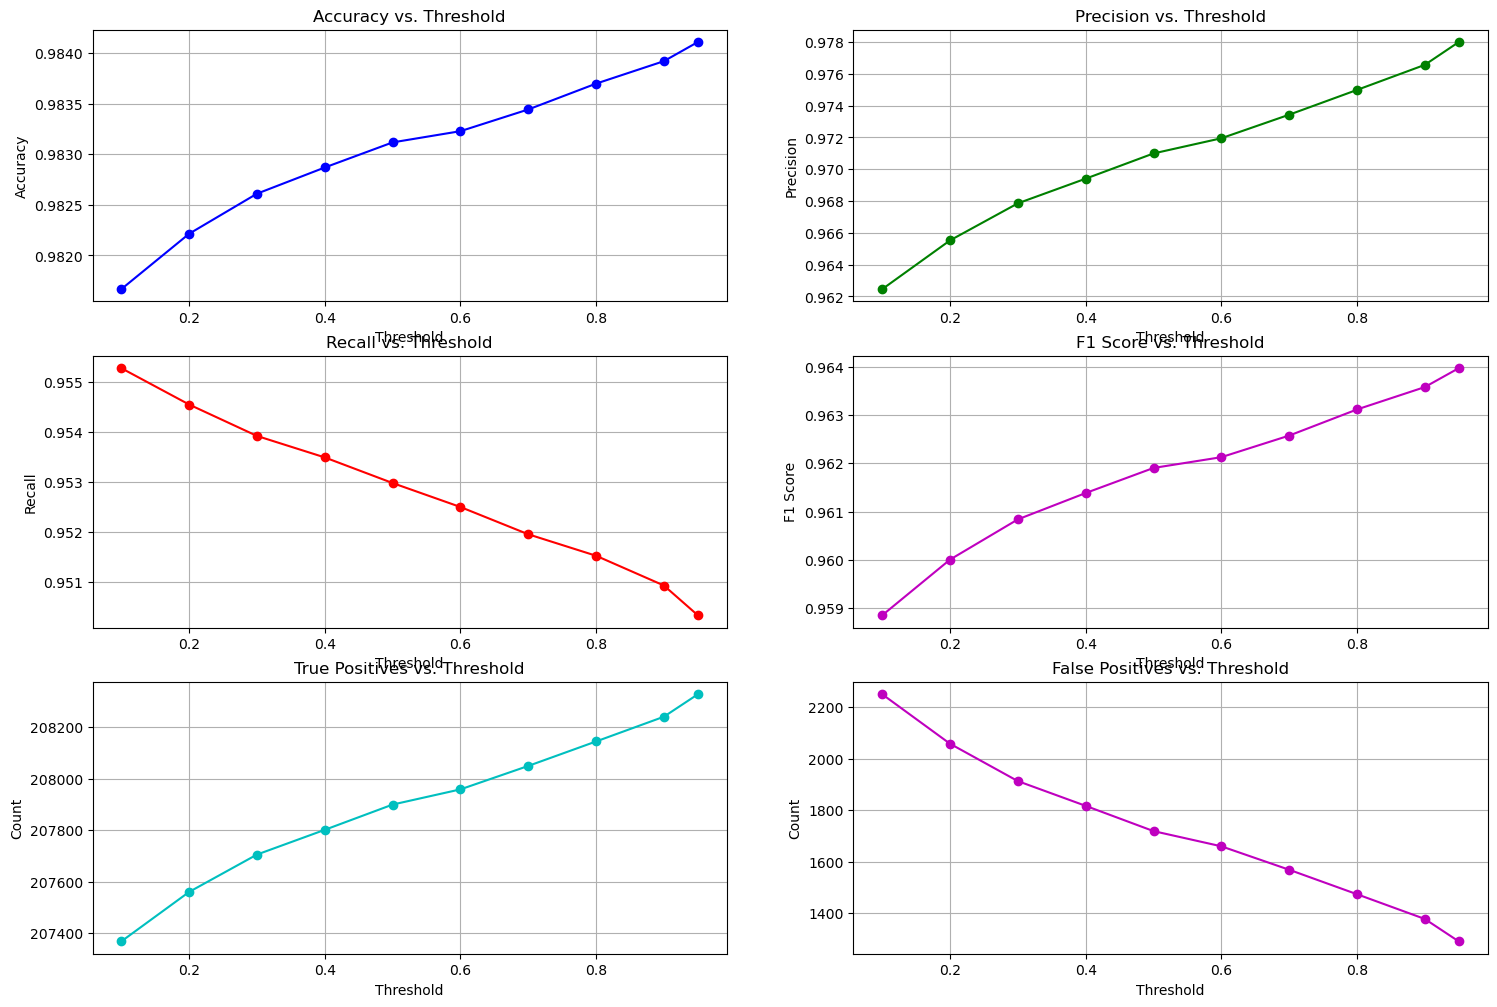

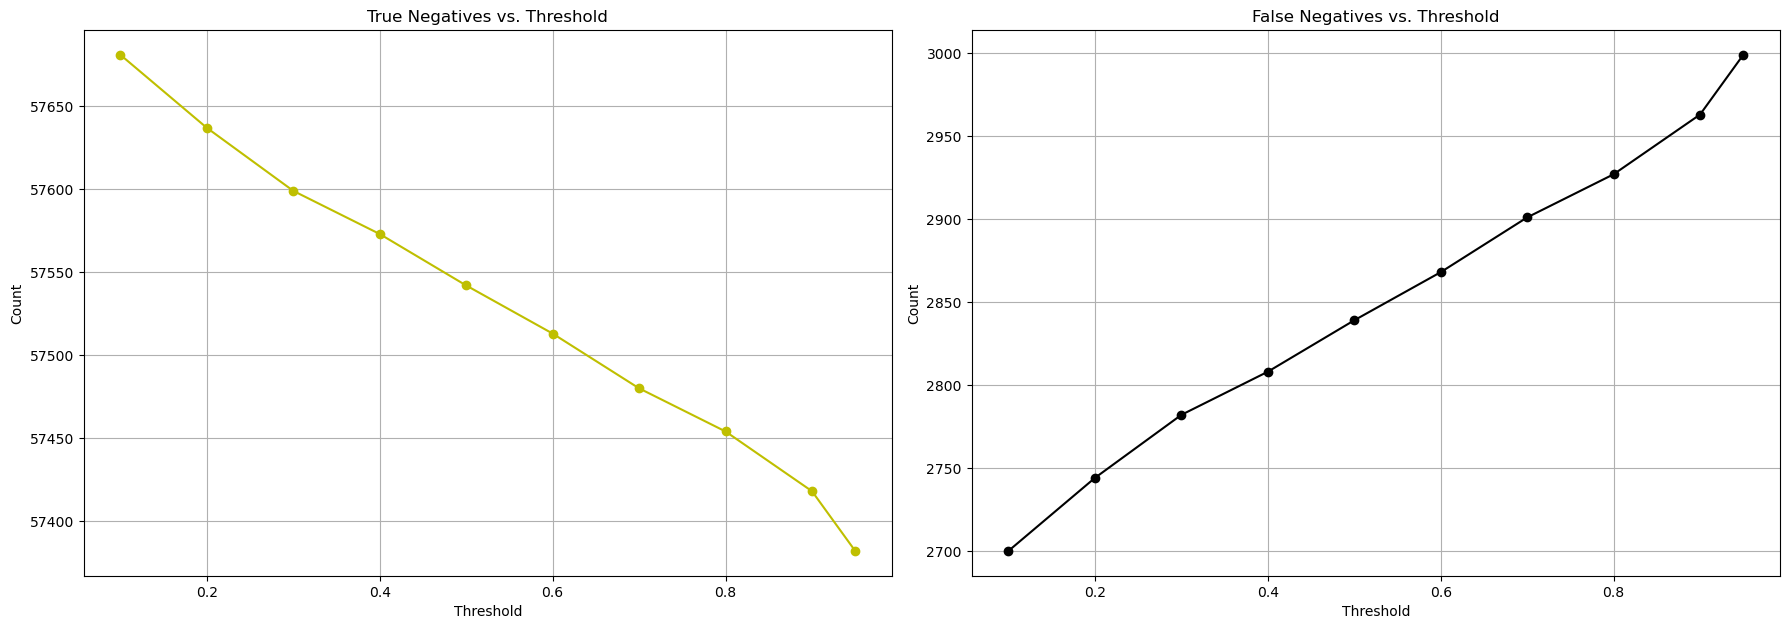

In [ ]:
plot_metrics_and_confusion_components(new_feature_vector_val1,val_mask)

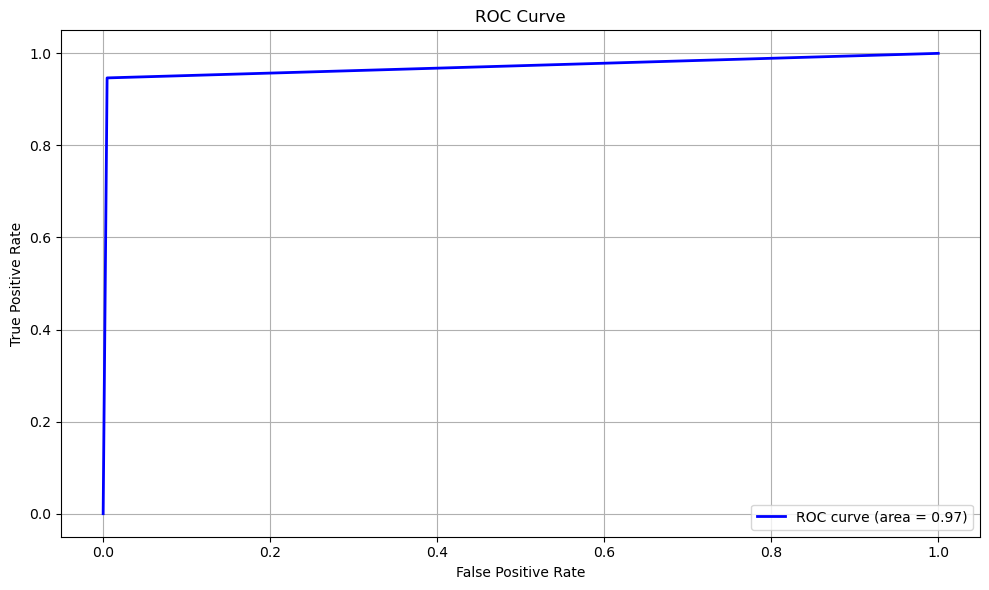

0.970964376861516

In [ ]:
plot_roc_curve(classified_image, val_mask)

Threshold: 0.1, IoU Score: 0.9250
Threshold: 0.2, IoU Score: 0.9266
Threshold: 0.3, IoU Score: 0.9276
Threshold: 0.4, IoU Score: 0.9282
Threshold: 0.5, IoU Score: 0.9289
Threshold: 0.6, IoU Score: 0.9291
Threshold: 0.7, IoU Score: 0.9297
Threshold: 0.8, IoU Score: 0.9304
Threshold: 0.9, IoU Score: 0.9310
Threshold: 0.95, IoU Score: 0.9316


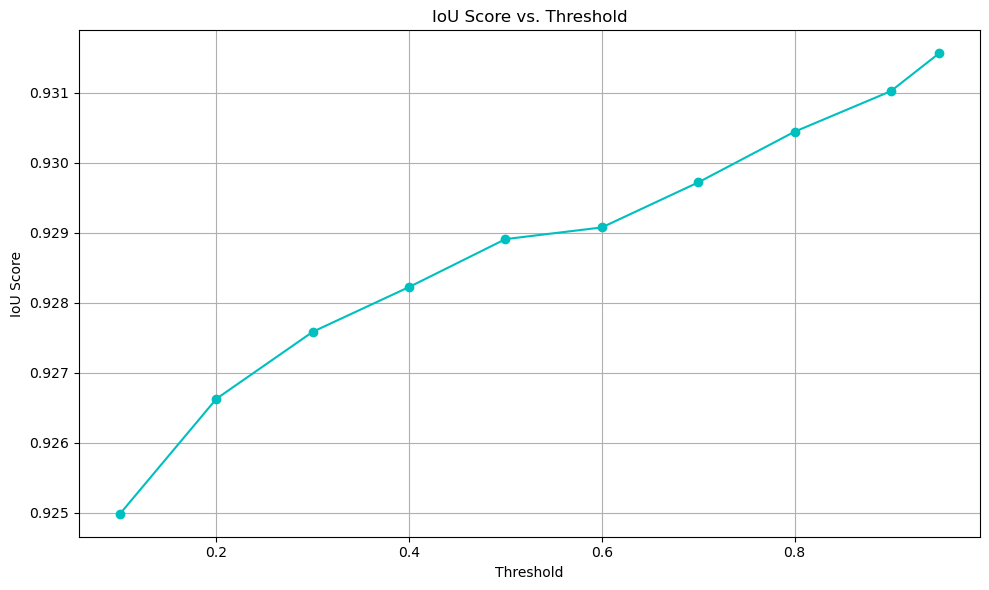

In [ ]:
evaluate_iou_vs_thresholds(new_feature_vector_val1,val_mask)

EVALUATE THE SECOND GROUP OF SELECTED FEATURES

In [ ]:
 #Extract foreground and background features
fg_features = new_feature_vector_train2[train_mask > 0]
bg_features = new_feature_vector_train2[train_mask == 0]

# Calculate mean and covariance for foreground pixels
mean_fg = np.mean(fg_features, axis=0)
cov_fg = np.cov(fg_features, rowvar=False)

# Calculate mean and covariance for background pixels
mean_bg = np.mean(bg_features, axis=0)
cov_bg = np.cov(bg_features, rowvar=False)

N_fg  = np.sum(train_mask > 0)
N_bg =  np.sum(train_mask == 0)

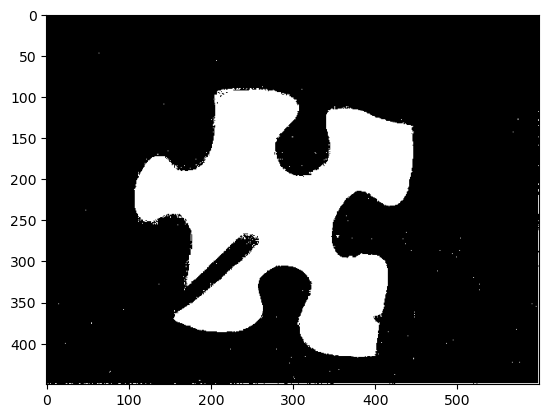

In [ ]:
classified_image=classifier(new_feature_vector_val2,0.95)
plt.imshow(classified_image, cmap='gray')

SUMMARY OF EVALUATION METRICS

Accuracy: 0.9806592592592592
Precision: 0.9578650286378352
Recall: 0.9555489309551017
F1 Score: 0.9567055780327652


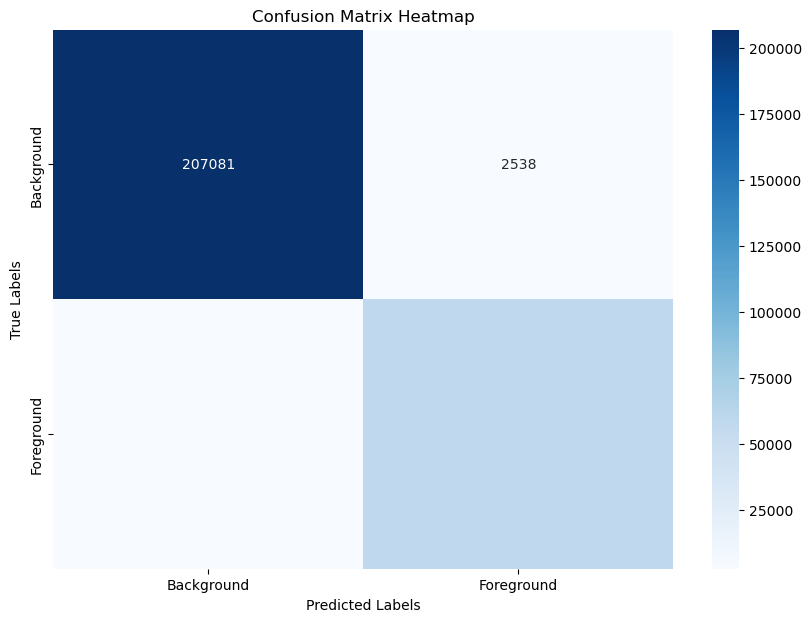

In [ ]:
accuracy, precision, recall, f1, conf_matrix = calculate_metrics(classified_image, val_mask)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
        xticklabels=['Background', 'Foreground'], yticklabels=['Background', 'Foreground'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

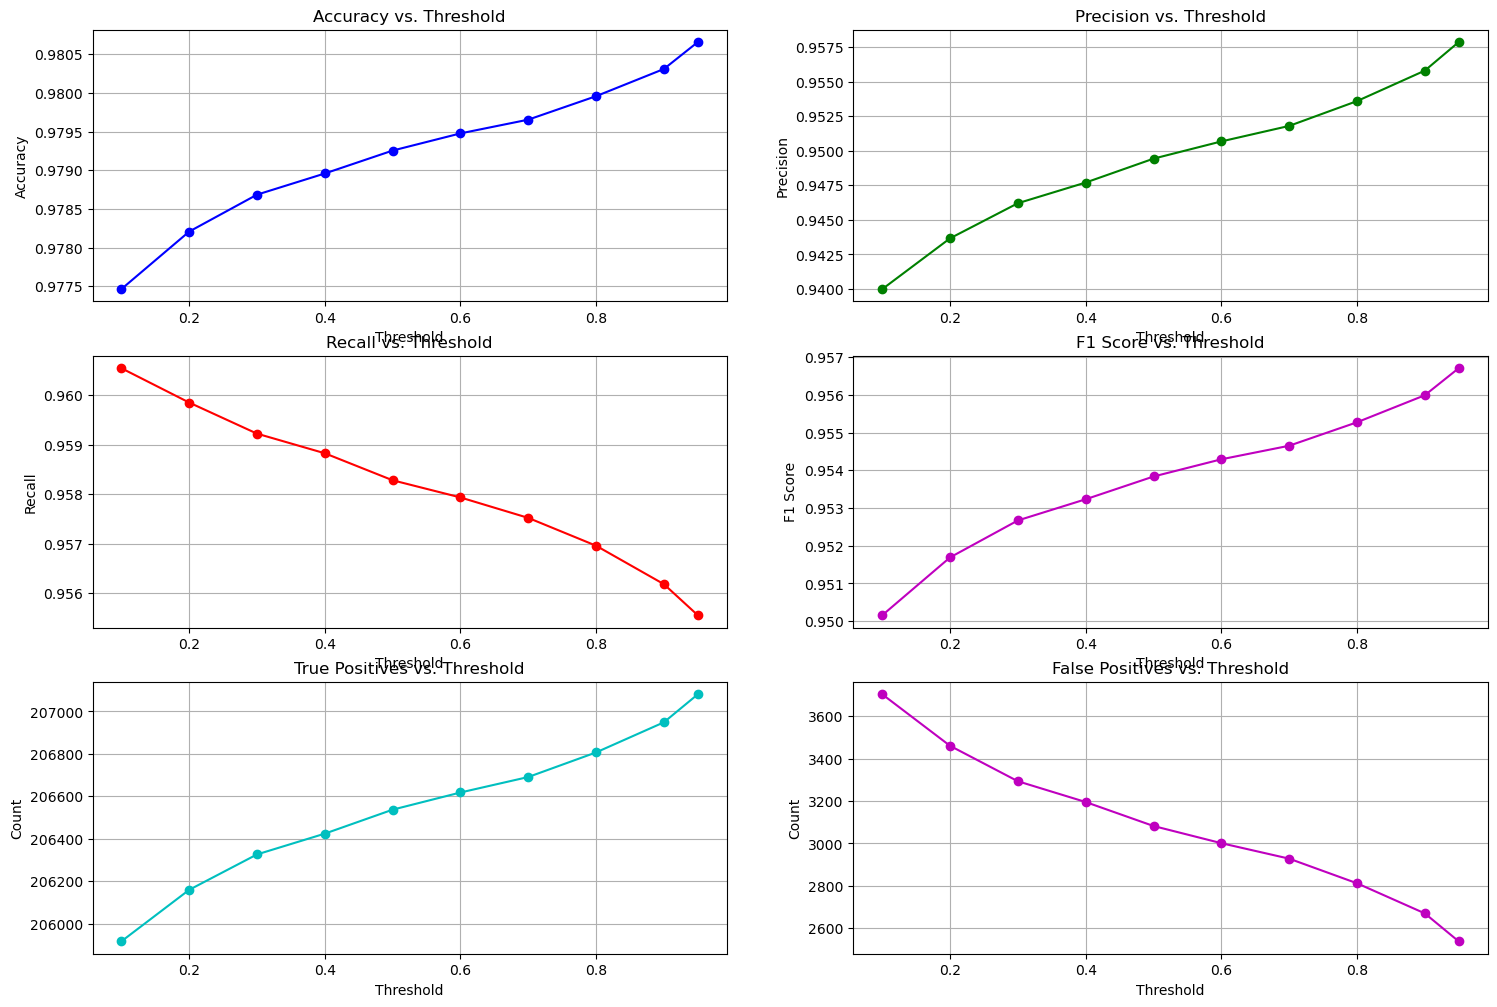

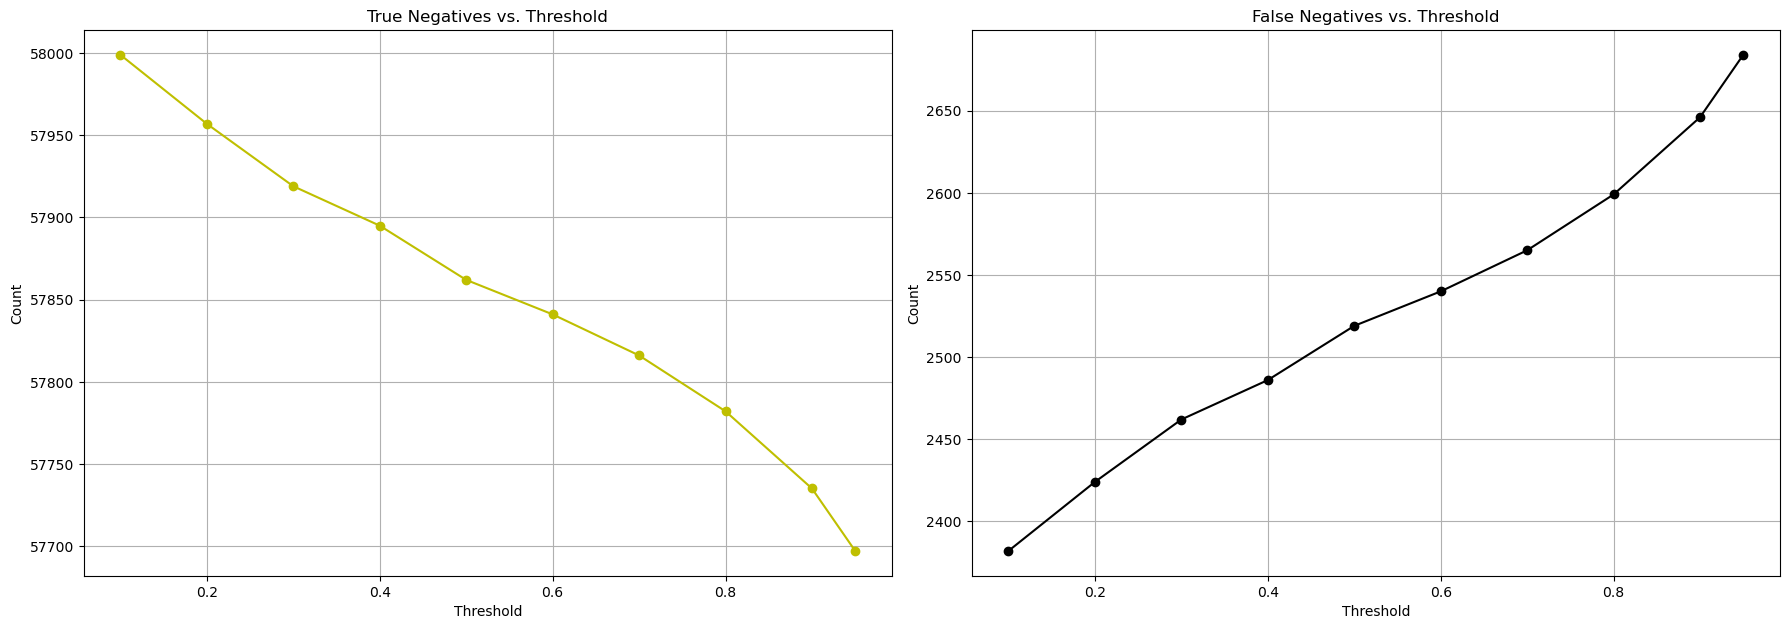

In [ ]:
plot_metrics_and_confusion_components(new_feature_vector_val2,val_mask)

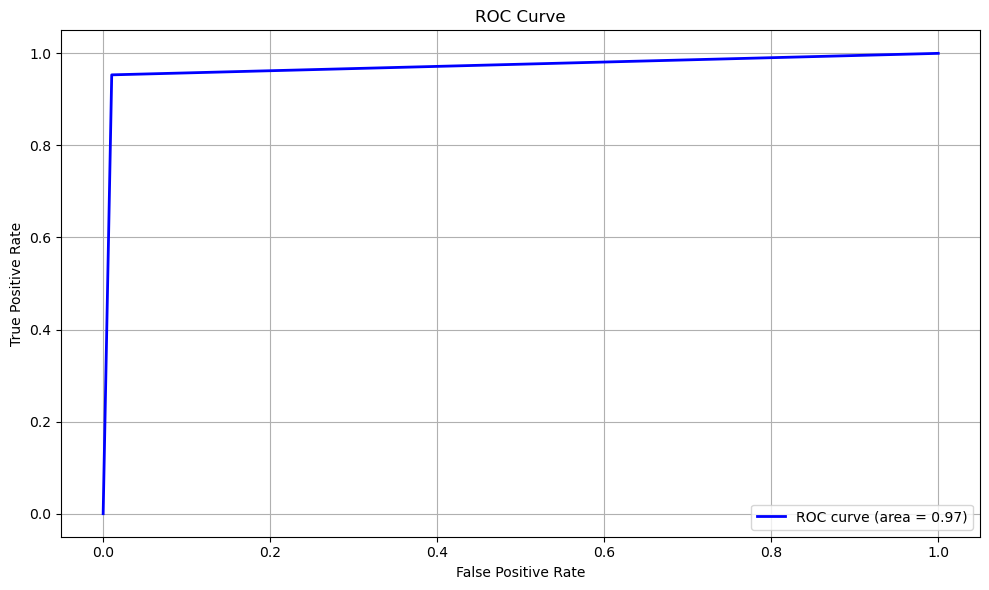

0.9715203725718268

In [ ]:
plot_roc_curve(classified_image, val_mask)

Threshold: 0.1, IoU Score: 0.9111
Threshold: 0.2, IoU Score: 0.9136
Threshold: 0.3, IoU Score: 0.9152
Threshold: 0.4, IoU Score: 0.9161
Threshold: 0.5, IoU Score: 0.9170
Threshold: 0.6, IoU Score: 0.9177
Threshold: 0.7, IoU Score: 0.9181
Threshold: 0.8, IoU Score: 0.9189
Threshold: 0.9, IoU Score: 0.9200
Threshold: 0.95, IoU Score: 0.9209


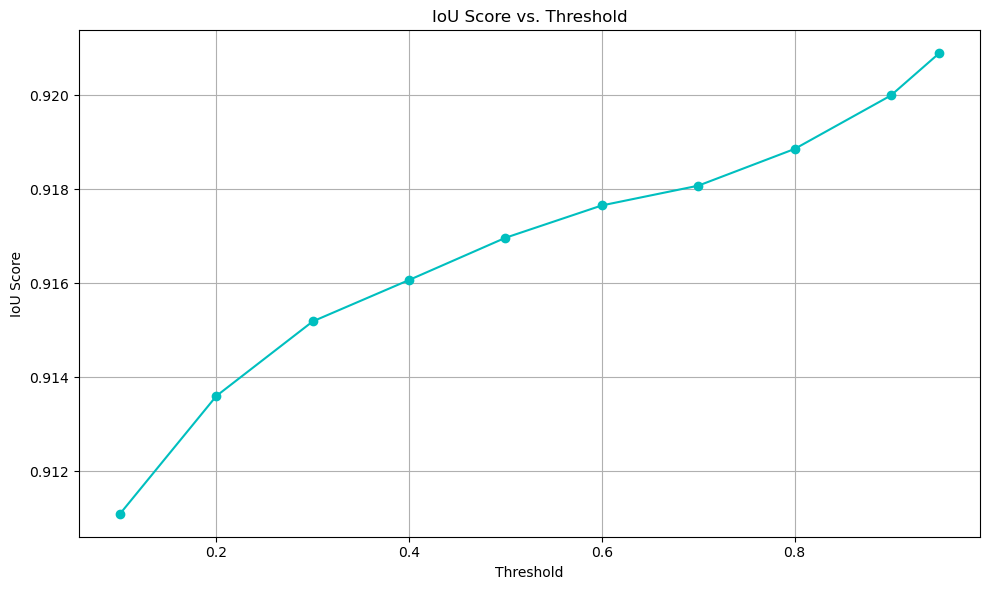

In [ ]:
evaluate_iou_vs_thresholds(new_feature_vector_val2, val_mask)

EVALUATE THE THIRD GROUP OF FEATURE SELECTION

In [ ]:
# Extract foreground and background features
fg_features = new_feature_vector_train3[train_mask > 0]
bg_features = new_feature_vector_train3[train_mask == 0]

# Calculate mean and covariance for foreground pixels
mean_fg = np.mean(fg_features, axis=0)
cov_fg = np.cov(fg_features, rowvar=False)

# Calculate mean and covariance for background pixels
mean_bg = np.mean(bg_features, axis=0)
cov_bg = np.cov(bg_features, rowvar=False)

N_fg  = np.sum(train_mask > 0)
N_bg =  np.sum(train_mask == 0)

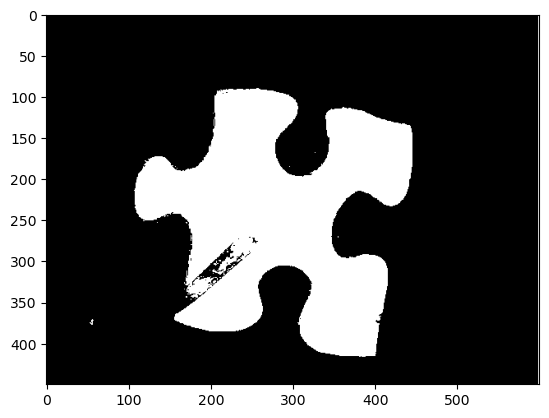

In [ ]:
classified_image=classifier(new_feature_vector_val3,0.7)
plt.imshow(classified_image, cmap='gray')

#### SUMMARY OF EVALUATION METRICS

Accuracy: 0.9857666666666667
Precision: 0.959748243559719
Recall: 0.9773438664480548
F1 Score: 0.9684661398715013


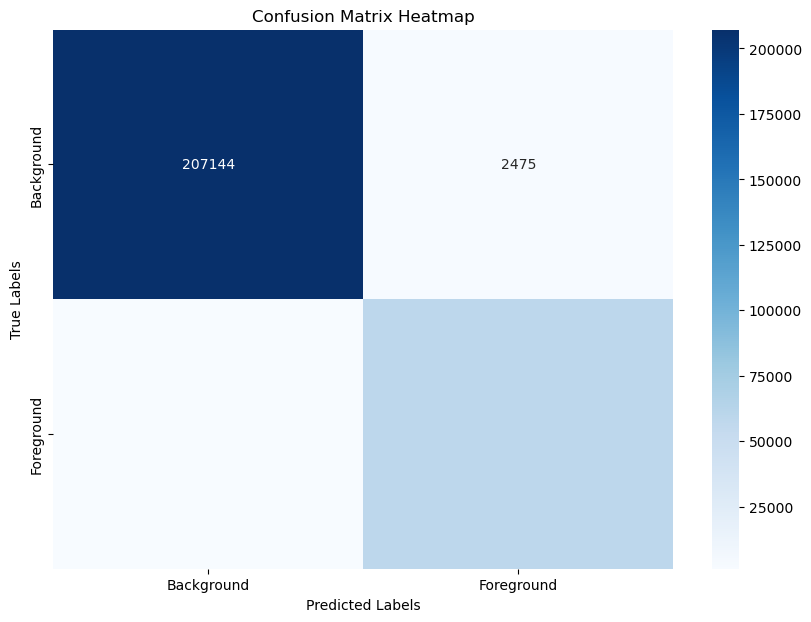

In [ ]:
accuracy, precision, recall, f1, conf_matrix = calculate_metrics(classified_image, val_mask)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
        xticklabels=['Background', 'Foreground'], yticklabels=['Background', 'Foreground'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

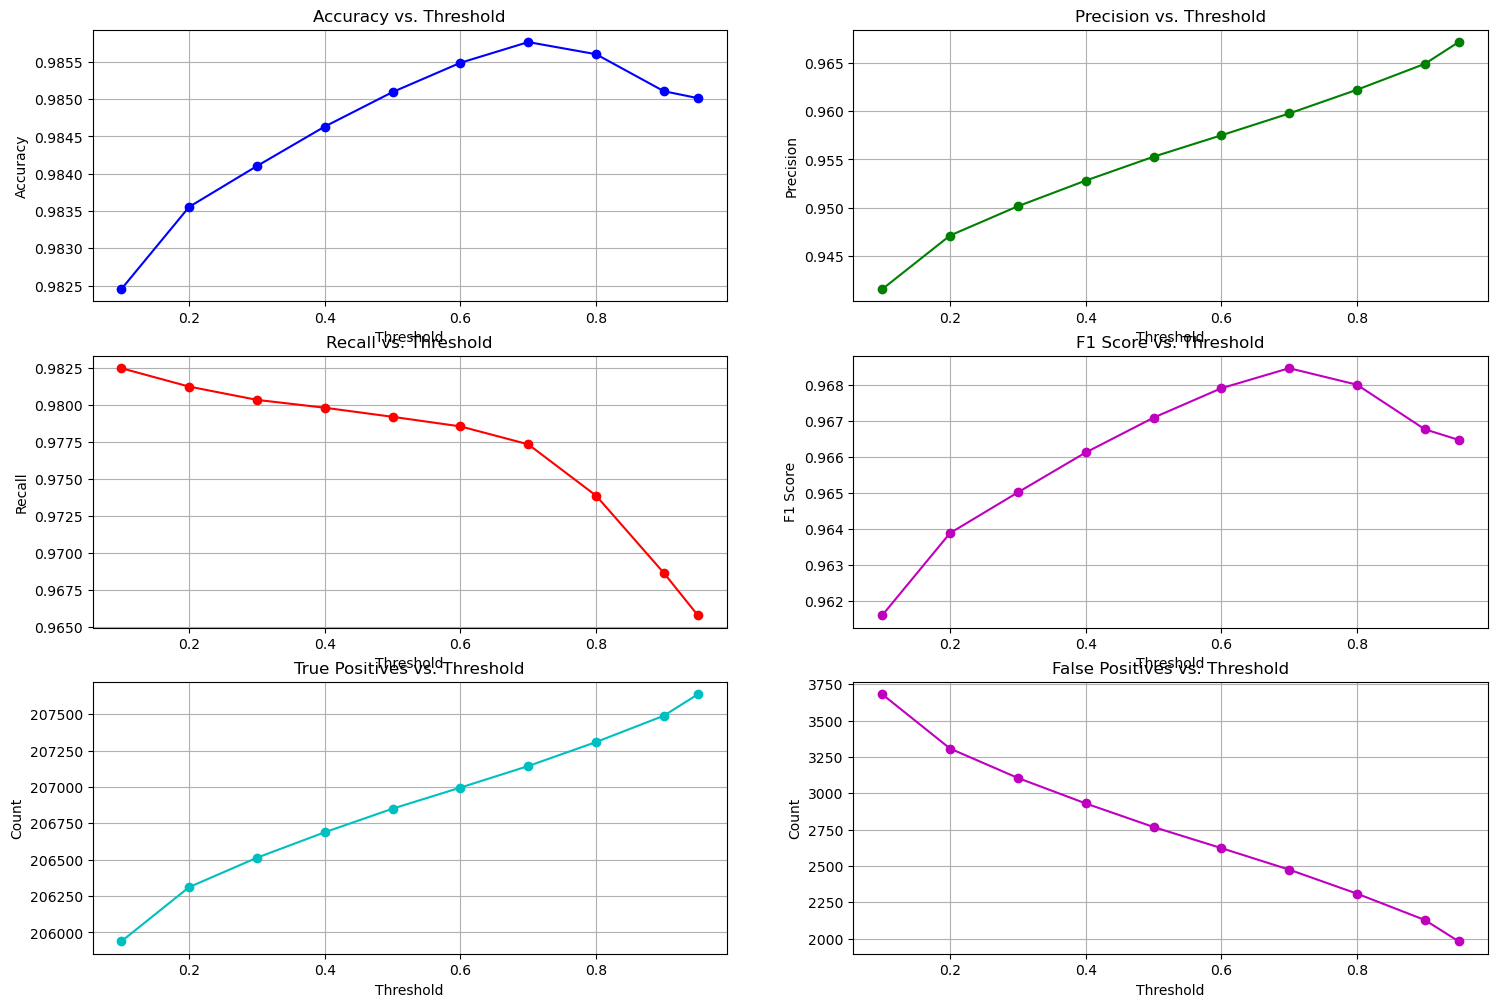

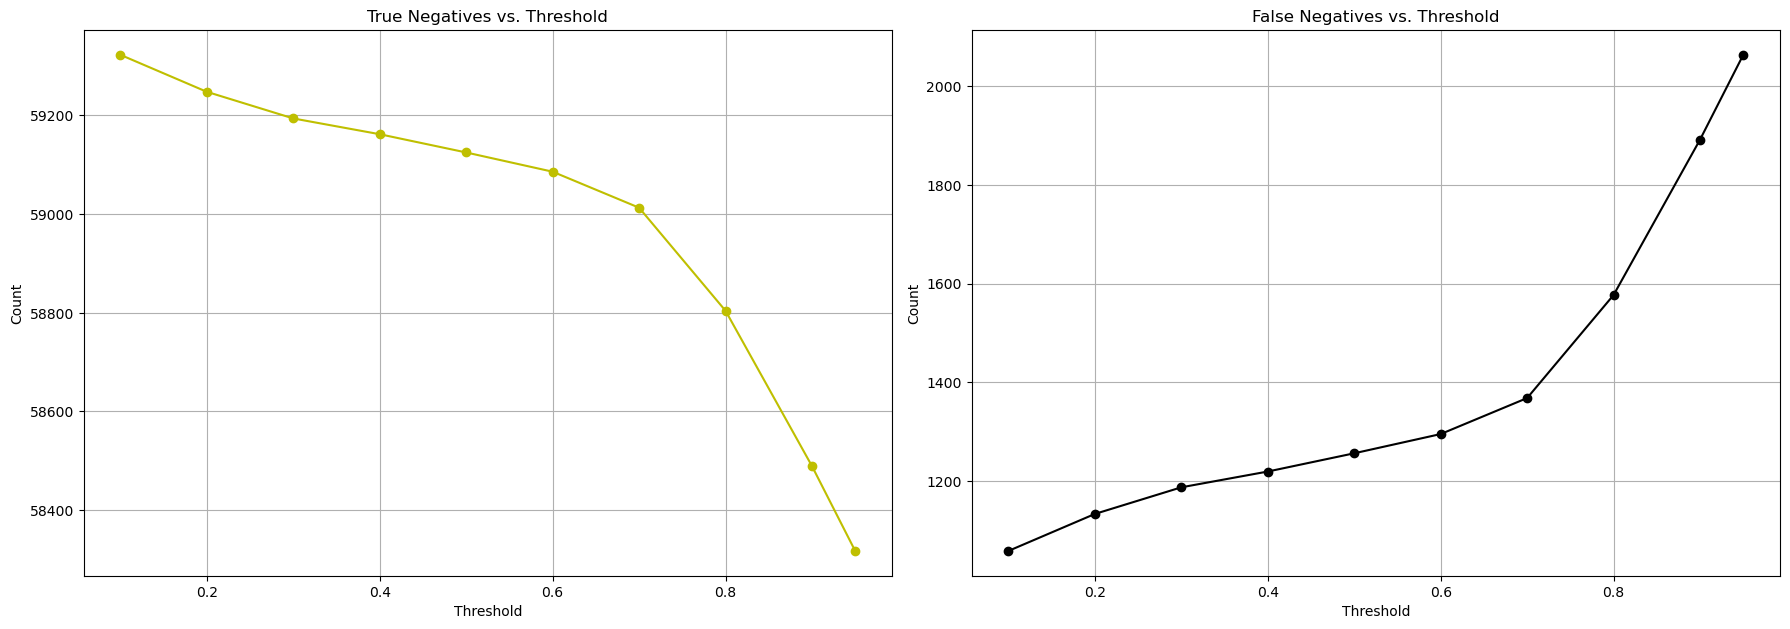

In [ ]:
plot_metrics_and_confusion_components(new_feature_vector_val3,val_mask)

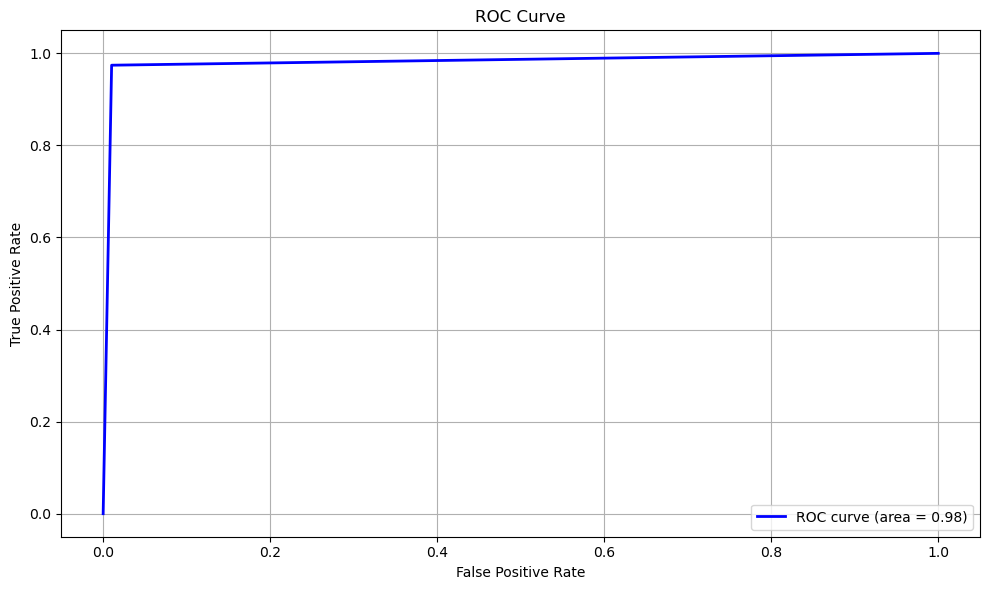

0.9820558062292554

In [ ]:
plot_roc_curve(classified_image, val_mask)

Threshold: 0.1, IoU Score: 0.9310
Threshold: 0.2, IoU Score: 0.9344
Threshold: 0.3, IoU Score: 0.9362
Threshold: 0.4, IoU Score: 0.9380
Threshold: 0.5, IoU Score: 0.9395
Threshold: 0.6, IoU Score: 0.9408
Threshold: 0.7, IoU Score: 0.9415
Threshold: 0.8, IoU Score: 0.9401
Threshold: 0.9, IoU Score: 0.9373
Threshold: 0.95, IoU Score: 0.9362


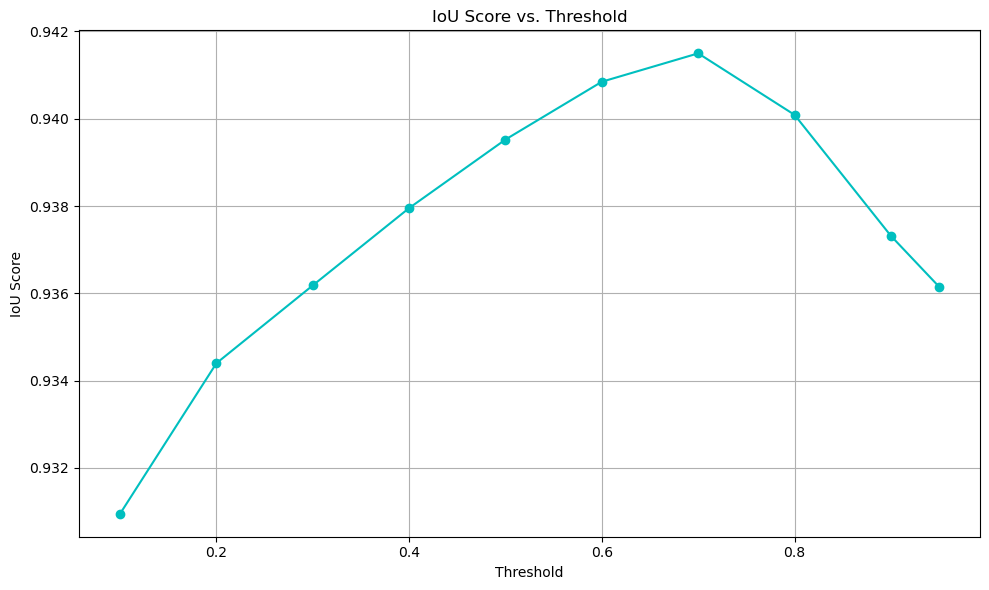

In [ ]:
evaluate_iou_vs_thresholds(new_feature_vector_val3, val_mask)



### Feature Selection and Performance Evaluation Summary

| Feature Set | Features                                                                                 | Accuracy | Precision | Recall | F1 Score | IoU    |
|-------------|------------------------------------------------------------------------------------------|----------|-----------|--------|----------|--------|
| **Set 1**   | HSV color features and R and B color features (5) | 0.9841  | 0.9780    | 0.9503 | 0.9640  | 0.9316 |
| **Set 2**   | Laplacian filter for RGB channels, RGB color features and HSV Color (9) features                                                    | 0.9841   | 0.9780    | 0.9503 | 0.9640   | 0.9209 |
| **Set 3**   | RGB,HSV and some Laplacian(6) | 0.9857   | 0.9597    | 0.9773 | 0.9685  | 0.9415|

**Conclusion:**

- **Best Feature Set:** We selected the model with **Feature Set 3** as the final model due to its highest performance metrics across the board. It achieved the highest accuracy, precision,  and F1 score, along with the highest IoU score among the evaluated sets.
- **Justification:** Feature Set 3’s superior performance perhaps suggests that RGB and some HSV color features, along with the firdst laplacian feature alone provides a robust representation of the image data, leading to better classification and segmentation results. The omission of edge and texture features in this set did not negatively impact performance, indicating that color features alone were sufficient for the task.



EVALUATE FOR TEST IMAGE

In [ ]:
fg_features = new_feature_vector_test3[train_mask > 0]
bg_features = new_feature_vector_test3[train_mask == 0]

mean_fg = np.mean(fg_features, axis=0)
cov_fg = np.cov(fg_features, rowvar=False)

mean_bg = np.mean(bg_features, axis=0)
cov_bg = np.cov(bg_features, rowvar=False)

N_fg  = np.sum(train_mask > 0)
N_bg =  np.sum(train_mask == 0)

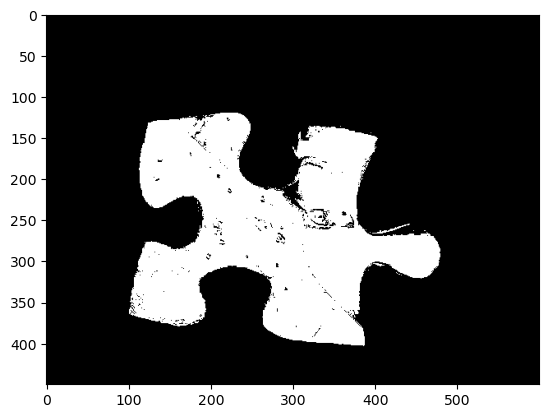

In [ ]:
classified_image=classifier(new_feature_vector_test3,0.7)
plt.imshow(classified_image, cmap='gray')

Accuracy: 0.9811148148148148
Precision: 0.985394725389503
Recall: 0.9300101863109125
F1 Score: 0.9569017251143174


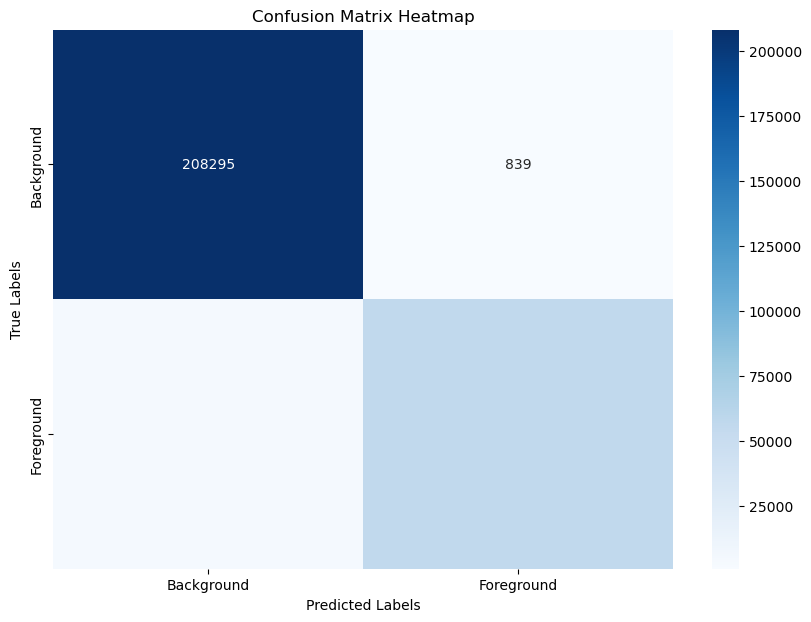

In [ ]:
accuracy, precision, recall, f1, conf_matrix = calculate_metrics(classified_image, test_mask)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
        xticklabels=['Background', 'Foreground'], yticklabels=['Background', 'Foreground'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

PROBABILITY DENSITY FUNCTION

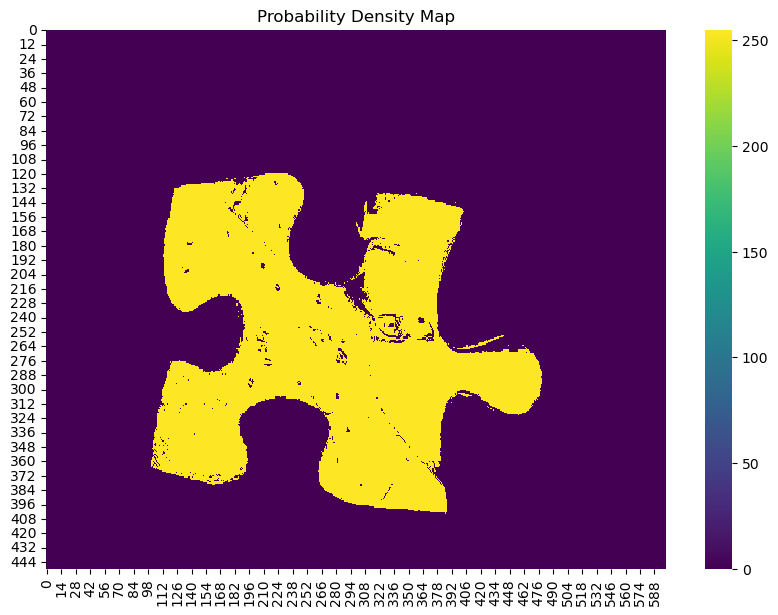

In [ ]:
# Plot the Probability density heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(classified_image, cmap='viridis', cbar=True)
plt.title('Probability Density Map')

plt.show()

When evaluating using the test image there is a reduction in performance. The model is mostly using the intensities of the RGB and HSV values of the images to determine if a pixel is in the foreground or background. It then struggles when a puzzle pixel is similar to the background. Incorporating texture features like Gabor filters and also using edge detection can help resolve this. Overfitting can also contribute to this, though there is little reduction with the validation image.